# Week 3 - Logistic Regression

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib
import math

In [4]:
data1 = pd.read_csv("ex2data1.txt", header=None)
data2 = pd.read_csv("ex2data2.txt", header=None)

In [6]:
data1.columns = ["Score1", "Score2", "Admission"]

In [7]:
data1.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


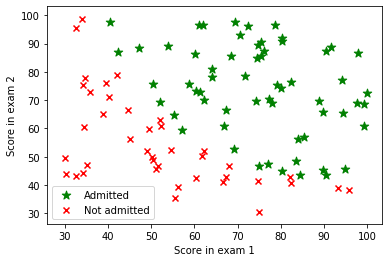

In [269]:
def plot_graph(data1):
    plt.scatter(data1[data1["Admission"] == 1]["Score1"], 
                data1[data1["Admission"] == 1]["Score2"], 
                c="green", 
                marker="*", 
                s=80,
                label="Admitted")

    plt.scatter(data1[data1["Admission"] == 0]["Score1"], 
                data1[data1["Admission"] == 0]["Score2"], 
                c="red", 
                marker="x",
               label="Not admitted")

    plt.legend(loc="lower left")

    plt.xlabel("Score in exam 1")
    plt.ylabel("Score in exam 2")

plot_graph(data1)
plt.show()

In [164]:
def sigmoid(num):
#     return 1 / (1 + math.e ** -num)
    return 1 / (1 + np.exp(-num))

In [65]:
sigmoid(0)

0.5

In [57]:
math.e

2.718281828459045

In [105]:
data1.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [310]:
def init_data(data):
    X = data[["Score1", "Score2"]]
    y = data["Admission"]
    m = len(y)
    theta = np.zeros(len(X.columns) + 1)
    alpha = 0.1
    
    mean = X.mean()
    std = np.sqrt((np.sum((X - mean) **2))/(m - 1))

    # Scale data
    X = (X - mean) / std
    X.insert(0, "Bias", 1)
    
    return X, y, m, theta, alpha, mean, std


In [311]:
def read_image(title, file, size=(5.5, 5.5)):
    img = image.imread(file)
    plt.figure(figsize=size)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.imshow(img)
    plt.show()

In [312]:
X, y, m, theta, alpha, mean, std = init_data(data1)

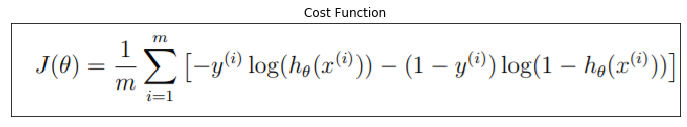

In [313]:
read_image("Cost Function", "cost function.PNG", (12, 12))

In [314]:
def calculate_cost(X, y, theta, m):
    h = sigmoid(X.dot(theta))
    return (1 / m) * np.sum((-y * np.log(h)) - ((1 - y) * np.log(1 - h)))
    
J = calculate_cost(X, y, theta, m)

In [315]:
J

0.6931471805599453

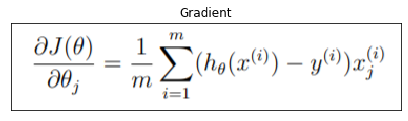

In [316]:
read_image("Gradient", "gradient.PNG", (7, 7))

In [317]:
def gradient_descent(X, y, theta, m, alpha):
    h = sigmoid(X.dot(theta))
    gradient = (1 / m) * X.T.dot(h - y)
    return theta - alpha * gradient

iterations = 10000

for i in range(iterations):
    theta = gradient_descent(X, y, theta, m, alpha)
    J = calculate_cost(X, y, theta, m)
    
    print(theta)
    print(J)
    

Bias      0.010000
Score1    0.027982
Score2    0.024973
dtype: float64
0.6782633298820677
Bias      0.019750
Score1    0.055286
Score2    0.049344
dtype: float64
0.6640913879681908
Bias      0.029257
Score1    0.081930
Score2    0.073129
dtype: float64
0.6505959696280857
Bias      0.038528
Score1    0.107932
Score2    0.096344
dtype: float64
0.6377425757122148
Bias      0.047569
Score1    0.133309
Score2    0.119005
dtype: float64
0.6254977546849891
Bias      0.056388
Score1    0.158081
Score2    0.141128
dtype: float64
0.6138292273538654
Bias      0.064993
Score1    0.182266
Score2    0.162729
dtype: float64
0.6027059783016026
Bias      0.073389
Score1    0.205883
Score2    0.183825
dtype: float64
0.5920983178701459
Bias      0.081586
Score1    0.228949
Score2    0.204432
dtype: float64
0.5819779186254935
Bias      0.089588
Score1    0.251482
Score2    0.224566
dtype: float64
0.572317830144634
Bias      0.097404
Score1    0.273502
Score2    0.244242
dtype: float64
0.5630924757555732


Bias      0.452326
Score1    1.249716
Score2    1.120200
dtype: float64
0.31747499607622426
Bias      0.455018
Score1    1.256637
Score2    1.126468
dtype: float64
0.3165343538206777
Bias      0.457693
Score1    1.263502
Score2    1.132686
dtype: float64
0.31560861419354724
Bias      0.460349
Score1    1.270311
Score2    1.138856
dtype: float64
0.3146974142961277
Bias      0.462988
Score1    1.277065
Score2    1.144977
dtype: float64
0.31380040303921386
Bias      0.465610
Score1    1.283765
Score2    1.151050
dtype: float64
0.31291724066757837
Bias      0.468215
Score1    1.290413
Score2    1.157077
dtype: float64
0.31204759830706086
Bias      0.470804
Score1    1.297007
Score2    1.163059
dtype: float64
0.311191157533041
Bias      0.473376
Score1    1.303551
Score2    1.168995
dtype: float64
0.31034760995913874
Bias      0.475932
Score1    1.310044
Score2    1.174887
dtype: float64
0.3095166568450548
Bias      0.478473
Score1    1.316487
Score2    1.180735
dtype: float64
0.30869800872

Bias      0.682626
Score1    1.805346
Score2    1.629682
dtype: float64
0.26080420436238244
Bias      0.684216
Score1    1.808955
Score2    1.633038
dtype: float64
0.26053656918587426
Bias      0.685799
Score1    1.812549
Score2    1.636382
dtype: float64
0.2602710768753198
Bias      0.687378
Score1    1.816128
Score2    1.639712
dtype: float64
0.2600077012692785
Bias      0.688950
Score1    1.819693
Score2    1.643029
dtype: float64
0.25974641664105746
Bias      0.690518
Score1    1.823242
Score2    1.646332
dtype: float64
0.2594871976895899
Bias      0.692080
Score1    1.826778
Score2    1.649623
dtype: float64
0.2592300195305429
Bias      0.693636
Score1    1.830298
Score2    1.652902
dtype: float64
0.25897485768765
Bias      0.695188
Score1    1.833805
Score2    1.656167
dtype: float64
0.25872168808425966
Bias      0.696734
Score1    1.837297
Score2    1.659420
dtype: float64
0.2584704870350952
Bias      0.698275
Score1    1.840776
Score2    1.662660
dtype: float64
0.25822123123821

Bias      0.839856
Score1    2.152431
Score2    1.955206
dtype: float64
0.23928814627016842
Bias      0.840979
Score1    2.154853
Score2    1.957496
dtype: float64
0.23916463484427872
Bias      0.842100
Score1    2.157268
Score2    1.959779
dtype: float64
0.23904179194875613
Bias      0.843217
Score1    2.159677
Score2    1.962056
dtype: float64
0.23891961223435826
Bias      0.844332
Score1    2.162079
Score2    1.964326
dtype: float64
0.23879809040990987
Bias      0.845444
Score1    2.164474
Score2    1.966591
dtype: float64
0.23867722124150362
Bias      0.846553
Score1    2.166863
Score2    1.968850
dtype: float64
0.23855699955171383
Bias      0.847660
Score1    2.169245
Score2    1.971103
dtype: float64
0.23843742021882414
Bias      0.848763
Score1    2.171620
Score2    1.973350
dtype: float64
0.23831847817606666
Bias      0.849864
Score1    2.173990
Score2    1.975590
dtype: float64
0.2382001684108753
Bias      0.850963
Score1    2.176352
Score2    1.977825
dtype: float64
0.2380824

Bias      0.948813
Score1    2.385005
Score2    2.175926
dtype: float64
0.2288147645621817
Bias      0.949687
Score1    2.386856
Score2    2.177689
dtype: float64
0.22874185294524668
Bias      0.950560
Score1    2.388703
Score2    2.179449
dtype: float64
0.22866925114771328
Bias      0.951430
Score1    2.390546
Score2    2.181204
dtype: float64
0.22859695728004611
Bias      0.952299
Score1    2.392385
Score2    2.182956
dtype: float64
0.228524969468208
Bias      0.953166
Score1    2.394220
Score2    2.184705
dtype: float64
0.2284532858534989
Bias      0.954032
Score1    2.396051
Score2    2.186449
dtype: float64
0.22838190459239646
Bias      0.954895
Score1    2.397878
Score2    2.188190
dtype: float64
0.22831082385639964
Bias      0.955757
Score1    2.399702
Score2    2.189928
dtype: float64
0.22824004183187296
Bias      0.956617
Score1    2.401521
Score2    2.191662
dtype: float64
0.22816955671989425
Bias      0.957475
Score1    2.403337
Score2    2.193392
dtype: float64
0.2280993667

Bias      1.040353
Score1    2.578030
Score2    2.360240
dtype: float64
0.22198806970801044
Bias      1.041053
Score1    2.579502
Score2    2.361648
dtype: float64
0.22194168821628082
Bias      1.041753
Score1    2.580971
Score2    2.363055
dtype: float64
0.2218954699782121
Bias      1.042450
Score1    2.582438
Score2    2.364459
dtype: float64
0.22184941419255835
Bias      1.043147
Score1    2.583903
Score2    2.365860
dtype: float64
0.2218035200633033
Bias      1.043842
Score1    2.585364
Score2    2.367259
dtype: float64
0.2217577867996176
Bias      1.044537
Score1    2.586823
Score2    2.368656
dtype: float64
0.22171221361581583
Bias      1.04523
Score1    2.58828
Score2    2.37005
dtype: float64
0.22166679973131437
Bias      1.045921
Score1    2.589734
Score2    2.371441
dtype: float64
0.22162154437058973
Bias      1.046612
Score1    2.591185
Score2    2.372831
dtype: float64
0.22157644676313695
Bias      1.047301
Score1    2.592634
Score2    2.374218
dtype: float64
0.221531506143

Bias      1.115413
Score1    2.735631
Score2    2.511284
dtype: float64
0.21746191361256764
Bias      1.115991
Score1    2.736843
Score2    2.512447
dtype: float64
0.2174303918330413
Bias      1.116567
Score1    2.738053
Score2    2.513608
dtype: float64
0.2173989659560337
Bias      1.117143
Score1    2.739261
Score2    2.514768
dtype: float64
0.21736763558523325
Bias      1.117718
Score1    2.740467
Score2    2.515925
dtype: float64
0.2173364003264809
Bias      1.118292
Score1    2.741672
Score2    2.517081
dtype: float64
0.2173052597877551
Bias      1.118865
Score1    2.742874
Score2    2.518235
dtype: float64
0.21727421357915722
Bias      1.119437
Score1    2.744075
Score2    2.519388
dtype: float64
0.21724326131289728
Bias      1.120009
Score1    2.745274
Score2    2.520539
dtype: float64
0.21721240260327943
Bias      1.120580
Score1    2.746471
Score2    2.521688
dtype: float64
0.21718163706668783
Bias      1.121149
Score1    2.747666
Score2    2.522835
dtype: float64
0.2171509643

Bias      1.178020
Score1    2.866988
Score2    2.637467
dtype: float64
0.21431286802528304
Bias      1.178508
Score1    2.868010
Score2    2.638450
dtype: float64
0.21429040665500446
Bias      1.178994
Score1    2.869031
Score2    2.639432
dtype: float64
0.21426800611855046
Bias      1.179480
Score1    2.870050
Score2    2.640412
dtype: float64
0.21424566619735028
Bias      1.179965
Score1    2.871068
Score2    2.641390
dtype: float64
0.21422338667385252
Bias      1.180449
Score1    2.872085
Score2    2.642368
dtype: float64
0.21420116733151986
Bias      1.180933
Score1    2.873100
Score2    2.643344
dtype: float64
0.21417900795482264
Bias      1.181416
Score1    2.874114
Score2    2.644319
dtype: float64
0.21415690832923343
Bias      1.181898
Score1    2.875126
Score2    2.645292
dtype: float64
0.21413486824122085
Bias      1.182380
Score1    2.876137
Score2    2.646265
dtype: float64
0.214112887478244
Bias      1.182861
Score1    2.877147
Score2    2.647235
dtype: float64
0.21409096

dtype: float64
0.21201436916819955
Bias      1.232092
Score1    2.980515
Score2    2.746694
dtype: float64
0.21199785101297208
Bias      1.232509
Score1    2.981390
Score2    2.747537
dtype: float64
0.211981373490866
Bias      1.232925
Score1    2.982264
Score2    2.748378
dtype: float64
0.21196493647209946
Bias      1.233340
Score1    2.983137
Score2    2.749219
dtype: float64
0.21194853982742273
Bias      1.233755
Score1    2.984008
Score2    2.750058
dtype: float64
0.21193218342811537
Bias      1.234170
Score1    2.984879
Score2    2.750896
dtype: float64
0.21191586714598337
Bias      1.234584
Score1    2.985749
Score2    2.751734
dtype: float64
0.21189959085335638
Bias      1.234997
Score1    2.986617
Score2    2.752570
dtype: float64
0.2118833544230853
Bias      1.235410
Score1    2.987485
Score2    2.753405
dtype: float64
0.21186715772853948
Bias      1.235822
Score1    2.988351
Score2    2.754239
dtype: float64
0.2118510006436041
Bias      1.236234
Score1    2.989217
Score2    2

Bias      1.273542
Score1    3.067644
Score2    2.830614
dtype: float64
0.2104540810237188
Bias      1.273908
Score1    3.068416
Score2    2.831357
dtype: float64
0.21044126777045397
Bias      1.274275
Score1    3.069186
Score2    2.832100
dtype: float64
0.2104284838163837
Bias      1.274641
Score1    3.069956
Score2    2.832842
dtype: float64
0.21041572907603381
Bias      1.275006
Score1    3.070725
Score2    2.833582
dtype: float64
0.21040300346424676
Bias      1.275371
Score1    3.071492
Score2    2.834322
dtype: float64
0.21039030689618032
Bias      1.275736
Score1    3.072259
Score2    2.835061
dtype: float64
0.21037763928730566
Bias      1.276100
Score1    3.073026
Score2    2.835800
dtype: float64
0.21036500055340646
Bias      1.276464
Score1    3.073791
Score2    2.836537
dtype: float64
0.21035239061057723
Bias      1.276827
Score1    3.074555
Score2    2.837274
dtype: float64
0.2103398093752218
Bias      1.277190
Score1    3.075319
Score2    2.838009
dtype: float64
0.210327256

Bias      1.313106
Score1    3.150924
Score2    2.910889
dtype: float64
0.20915349554246998
Bias      1.313429
Score1    3.151603
Score2    2.911544
dtype: float64
0.20914356064485531
Bias      1.313751
Score1    3.152281
Score2    2.912198
dtype: float64
0.2091336469821008
Bias      1.314072
Score1    3.152959
Score2    2.912851
dtype: float64
0.20912375449729367
Bias      1.314394
Score1    3.153636
Score2    2.913504
dtype: float64
0.209113883133713
Bias      1.314715
Score1    3.154312
Score2    2.914156
dtype: float64
0.20910403283482817
Bias      1.315035
Score1    3.154988
Score2    2.914807
dtype: float64
0.20909420354429906
Bias      1.315356
Score1    3.155663
Score2    2.915458
dtype: float64
0.2090843952059743
Bias      1.315676
Score1    3.156337
Score2    2.916108
dtype: float64
0.2090746077638911
Bias      1.315995
Score1    3.157010
Score2    2.916757
dtype: float64
0.20906484116227428
Bias      1.316315
Score1    3.157683
Score2    2.917406
dtype: float64
0.20905509534

Bias      1.345153
Score1    3.218472
Score2    2.976039
dtype: float64
0.20821644967475267
Bias      1.345442
Score1    3.219081
Score2    2.976626
dtype: float64
0.20820846615579114
Bias      1.345730
Score1    3.219689
Score2    2.977213
dtype: float64
0.20820049880980368
Bias      1.346018
Score1    3.220296
Score2    2.977799
dtype: float64
0.2081925475962996
Bias      1.346306
Score1    3.220903
Score2    2.978385
dtype: float64
0.20818461247491407
Bias      1.346593
Score1    3.221509
Score2    2.978969
dtype: float64
0.2081766934054079
Bias      1.346880
Score1    3.222115
Score2    2.979554
dtype: float64
0.20816879034766703
Bias      1.347167
Score1    3.222720
Score2    2.980138
dtype: float64
0.20816090326170217
Bias      1.347454
Score1    3.223325
Score2    2.980721
dtype: float64
0.20815303210764793
Bias      1.347740
Score1    3.223928
Score2    2.981303
dtype: float64
0.20814517684576278
Bias      1.348026
Score1    3.224532
Score2    2.981885
dtype: float64
0.20813733

Bias      1.377533
Score1    3.286815
Score2    3.041988
dtype: float64
0.20736979450523077
Bias      1.377790
Score1    3.287356
Score2    3.042511
dtype: float64
0.20736348235035812
Bias      1.378046
Score1    3.287897
Score2    3.043033
dtype: float64
0.2073571823190415
Bias      1.378301
Score1    3.288437
Score2    3.043554
dtype: float64
0.20735089438293586
Bias      1.378557
Score1    3.288977
Score2    3.044075
dtype: float64
0.20734461851377772
Bias      1.378812
Score1    3.289516
Score2    3.044595
dtype: float64
0.20733835468338493
Bias      1.379067
Score1    3.290055
Score2    3.045115
dtype: float64
0.2073321028636561
Bias      1.379322
Score1    3.290593
Score2    3.045635
dtype: float64
0.20732586302657083
Bias      1.379576
Score1    3.291130
Score2    3.046154
dtype: float64
0.20731963514418883
Bias      1.379831
Score1    3.291668
Score2    3.046672
dtype: float64
0.20731341918865012
Bias      1.380085
Score1    3.292204
Score2    3.047190
dtype: float64
0.20730721

Bias      1.406138
Score1    3.347272
Score2    3.100352
dtype: float64
0.20670166278920257
Bias      1.406367
Score1    3.347756
Score2    3.100820
dtype: float64
0.20669660531167922
Bias      1.406596
Score1    3.348240
Score2    3.101287
dtype: float64
0.20669155710786105
Bias      1.406825
Score1    3.348724
Score2    3.101754
dtype: float64
0.20668651815733188
Bias      1.407053
Score1    3.349207
Score2    3.102221
dtype: float64
0.20668148843973025
Bias      1.407282
Score1    3.349690
Score2    3.102687
dtype: float64
0.20667646793474934
Bias      1.407510
Score1    3.350172
Score2    3.103152
dtype: float64
0.20667145662213657
Bias      1.407737
Score1    3.350654
Score2    3.103617
dtype: float64
0.20666645448169368
Bias      1.407965
Score1    3.351135
Score2    3.104082
dtype: float64
0.20666146149327652
Bias      1.408192
Score1    3.351616
Score2    3.104547
dtype: float64
0.20665647763679462
Bias      1.408420
Score1    3.352097
Score2    3.105011
dtype: float64
0.206651

Bias      1.430118
Score1    3.398015
Score2    3.149354
dtype: float64
0.20619682554723462
Bias      1.430326
Score1    3.398454
Score2    3.149778
dtype: float64
0.20619267664788107
Bias      1.430533
Score1    3.398893
Score2    3.150202
dtype: float64
0.20618853506987514
Bias      1.430740
Score1    3.399331
Score2    3.150625
dtype: float64
0.20618440079788872
Bias      1.430946
Score1    3.399768
Score2    3.151047
dtype: float64
0.20618027381663237
Bias      1.431153
Score1    3.400205
Score2    3.151470
dtype: float64
0.20617615411085521
Bias      1.431359
Score1    3.400642
Score2    3.151892
dtype: float64
0.20617204166534503
Bias      1.431565
Score1    3.401079
Score2    3.152313
dtype: float64
0.2061679364649277
Bias      1.431771
Score1    3.401515
Score2    3.152734
dtype: float64
0.20616383849446768
Bias      1.431977
Score1    3.401951
Score2    3.153155
dtype: float64
0.20615974773886728
Bias      1.432182
Score1    3.402386
Score2    3.153576
dtype: float64
0.2061556

Bias      1.452792
Score1    3.446047
Score2    3.195750
dtype: float64
0.20576415971038411
Bias      1.452979
Score1    3.446444
Score2    3.196134
dtype: float64
0.2057607610972309
Bias      1.453166
Score1    3.446841
Score2    3.196517
dtype: float64
0.20575736827012514
Bias      1.453353
Score1    3.447237
Score2    3.196900
dtype: float64
0.20575398121751368
Bias      1.453540
Score1    3.447634
Score2    3.197283
dtype: float64
0.20575059992787093
Bias      1.453727
Score1    3.448029
Score2    3.197665
dtype: float64
0.2057472243896986
Bias      1.453913
Score1    3.448425
Score2    3.198047
dtype: float64
0.20574385459152608
Bias      1.454100
Score1    3.448820
Score2    3.198429
dtype: float64
0.20574049052191007
Bias      1.454286
Score1    3.449215
Score2    3.198810
dtype: float64
0.20573713216943443
Bias      1.454472
Score1    3.449609
Score2    3.199191
dtype: float64
0.2057337795227101
Bias      1.454658
Score1    3.450003
Score2    3.199572
dtype: float64
0.205730432

Bias      1.473665
Score1    3.490313
Score2    3.238518
dtype: float64
0.2054029727890545
Bias      1.473835
Score1    3.490673
Score2    3.238866
dtype: float64
0.20540017937461083
Bias      1.474004
Score1    3.491033
Score2    3.239214
dtype: float64
0.20539739056294895
Bias      1.474174
Score1    3.491392
Score2    3.239561
dtype: float64
0.20539460634526965
Bias      1.474343
Score1    3.491751
Score2    3.239908
dtype: float64
0.20539182671279402
Bias      1.474512
Score1    3.492110
Score2    3.240255
dtype: float64
0.2053890516567627
Bias      1.474681
Score1    3.492469
Score2    3.240601
dtype: float64
0.2053862811684362
Bias      1.474850
Score1    3.492827
Score2    3.240947
dtype: float64
0.20538351523909504
Bias      1.475019
Score1    3.493185
Score2    3.241293
dtype: float64
0.20538075386003918
Bias      1.475187
Score1    3.493543
Score2    3.241639
dtype: float64
0.20537799702258835
Bias      1.475356
Score1    3.493900
Score2    3.241984
dtype: float64
0.205375244

Bias      1.491517
Score1    3.528206
Score2    3.275136
dtype: float64
0.20512150068105295
Bias      1.491672
Score1    3.528535
Score2    3.275454
dtype: float64
0.20511916483249112
Bias      1.491827
Score1    3.528864
Score2    3.275772
dtype: float64
0.20511683272760067
Bias      1.491981
Score1    3.529193
Score2    3.276089
dtype: float64
0.205114504359486
Bias      1.492136
Score1    3.529521
Score2    3.276407
dtype: float64
0.20511217972126658
Bias      1.492291
Score1    3.529849
Score2    3.276724
dtype: float64
0.20510985880607674
Bias      1.492445
Score1    3.530177
Score2    3.277041
dtype: float64
0.20510754160706554
Bias      1.492599
Score1    3.530505
Score2    3.277358
dtype: float64
0.2051052281173969
Bias      1.492753
Score1    3.530832
Score2    3.277674
dtype: float64
0.20510291833024968
Bias      1.492908
Score1    3.531160
Score2    3.277990
dtype: float64
0.20510061223881715
Bias      1.493061
Score1    3.531486
Score2    3.278306
dtype: float64
0.205098309

Bias      1.506992
Score1    3.561082
Score2    3.306910
dtype: float64
0.20489743309789007
Bias      1.507134
Score1    3.561385
Score2    3.307203
dtype: float64
0.20489545221040145
Bias      1.507277
Score1    3.561688
Score2    3.307496
dtype: float64
0.20489347442290895
Bias      1.507419
Score1    3.561991
Score2    3.307788
dtype: float64
0.20489149972988352
Bias      1.507562
Score1    3.562293
Score2    3.308081
dtype: float64
0.2048895281258076
Bias      1.507704
Score1    3.562596
Score2    3.308373
dtype: float64
0.20488755960517516
Bias      1.507846
Score1    3.562898
Score2    3.308665
dtype: float64
0.2048855941624916
Bias      1.507988
Score1    3.563199
Score2    3.308956
dtype: float64
0.20488363179227378
Bias      1.508130
Score1    3.563501
Score2    3.309248
dtype: float64
0.20488167248904984
Bias      1.508272
Score1    3.563802
Score2    3.309539
dtype: float64
0.20487971624735926
Bias      1.508413
Score1    3.564103
Score2    3.309830
dtype: float64
0.20487776

Bias      1.522033
Score1    3.593061
Score2    3.337821
dtype: float64
0.20469698978345924
Bias      1.522164
Score1    3.593339
Score2    3.338090
dtype: float64
0.20469531907763303
Bias      1.522295
Score1    3.593618
Score2    3.338359
dtype: float64
0.2046936509269086
Bias      1.522426
Score1    3.593896
Score2    3.338628
dtype: float64
0.20469198532686916
Bias      1.522556
Score1    3.594173
Score2    3.338896
dtype: float64
0.20469032227310663
Bias      1.522687
Score1    3.594451
Score2    3.339165
dtype: float64
0.20468866176122183
Bias      1.522817
Score1    3.594728
Score2    3.339433
dtype: float64
0.2046870037868243
Bias      1.522948
Score1    3.595006
Score2    3.339701
dtype: float64
0.20468534834553245
Bias      1.523078
Score1    3.595283
Score2    3.339969
dtype: float64
0.20468369543297338
Bias      1.523208
Score1    3.595559
Score2    3.340236
dtype: float64
0.20468204504478293
Bias      1.523338
Score1    3.595836
Score2    3.340503
dtype: float64
0.20468039

dtype: float64
0.20453330389477664
Bias      1.535488
Score1    3.621688
Score2    3.365495
dtype: float64
0.20453188105713543
Bias      1.535609
Score1    3.621944
Score2    3.365743
dtype: float64
0.20453046035185155
Bias      1.535729
Score1    3.622201
Score2    3.365991
dtype: float64
0.20452904177533943
Bias      1.535850
Score1    3.622457
Score2    3.366239
dtype: float64
0.20452762532402088
Bias      1.535970
Score1    3.622714
Score2    3.366487
dtype: float64
0.2045262109943243
Bias      1.536091
Score1    3.622970
Score2    3.366734
dtype: float64
0.20452479878268523
Bias      1.536211
Score1    3.623225
Score2    3.366982
dtype: float64
0.20452338868554581
Bias      1.536331
Score1    3.623481
Score2    3.367229
dtype: float64
0.2045219806993552
Bias      1.536451
Score1    3.623736
Score2    3.367476
dtype: float64
0.20452057482056962
Bias      1.536571
Score1    3.623992
Score2    3.367722
dtype: float64
0.2045191710456516
Bias      1.536691
Score1    3.624247
Score2    

Bias      1.548343
Score1    3.649055
Score2    3.391954
dtype: float64
0.2043864246670293
Bias      1.548454
Score1    3.649291
Score2    3.392182
dtype: float64
0.20438521985415795
Bias      1.548565
Score1    3.649527
Score2    3.392411
dtype: float64
0.20438401681183038
Bias      1.548675
Score1    3.649764
Score2    3.392639
dtype: float64
0.204382815537149
Bias      1.548786
Score1    3.649999
Score2    3.392867
dtype: float64
0.20438161602722144
Bias      1.548897
Score1    3.650235
Score2    3.393095
dtype: float64
0.20438041827916054
Bias      1.549008
Score1    3.650471
Score2    3.393323
dtype: float64
0.204379222290085
Bias      1.549118
Score1    3.650706
Score2    3.393550
dtype: float64
0.20437802805711833
Bias      1.549229
Score1    3.650942
Score2    3.393778
dtype: float64
0.20437683557738984
Bias      1.549339
Score1    3.651177
Score2    3.394005
dtype: float64
0.20437564484803403
Bias      1.549449
Score1    3.651412
Score2    3.394232
dtype: float64
0.20437445586

Bias      1.559874
Score1    3.673621
Score2    3.415707
dtype: float64
0.20426597122491846
Bias      1.559977
Score1    3.673840
Score2    3.415918
dtype: float64
0.20426494193240724
Bias      1.560079
Score1    3.674058
Score2    3.416129
dtype: float64
0.20426391412650166
Bias      1.560182
Score1    3.674276
Score2    3.416340
dtype: float64
0.20426288780482613
Bias      1.560284
Score1    3.674494
Score2    3.416551
dtype: float64
0.20426186296500948
Bias      1.560386
Score1    3.674712
Score2    3.416762
dtype: float64
0.20426083960468489
Bias      1.560489
Score1    3.674930
Score2    3.416972
dtype: float64
0.20425981772148977
Bias      1.560591
Score1    3.675148
Score2    3.417183
dtype: float64
0.20425879731306587
Bias      1.560693
Score1    3.675365
Score2    3.417393
dtype: float64
0.20425777837705902
Bias      1.560795
Score1    3.675583
Score2    3.417603
dtype: float64
0.20425676091111958
Bias      1.560897
Score1    3.675800
Score2    3.417813
dtype: float64
0.204255

Bias      1.572232
Score1    3.699962
Score2    3.441178
dtype: float64
0.204147255140216
Bias      1.572325
Score1    3.700162
Score2    3.441371
dtype: float64
0.20414639576862048
Bias      1.572419
Score1    3.700362
Score2    3.441564
dtype: float64
0.20414553761548018
Bias      1.572513
Score1    3.700561
Score2    3.441757
dtype: float64
0.20414468067889768
Bias      1.572606
Score1    3.700760
Score2    3.441949
dtype: float64
0.20414382495697847
Bias      1.572699
Score1    3.700959
Score2    3.442142
dtype: float64
0.2041429704478318
Bias      1.572793
Score1    3.701158
Score2    3.442335
dtype: float64
0.20414211714956987
Bias      1.572886
Score1    3.701357
Score2    3.442527
dtype: float64
0.20414126506030836
Bias      1.572979
Score1    3.701556
Score2    3.442719
dtype: float64
0.20414041417816628
Bias      1.573072
Score1    3.701755
Score2    3.442911
dtype: float64
0.2041395645012658
Bias      1.573165
Score1    3.701953
Score2    3.443103
dtype: float64
0.2041387160

Bias      1.582665
Score1    3.722216
Score2    3.462698
dtype: float64
0.20405523694134675
Bias      1.582752
Score1    3.722400
Score2    3.462876
dtype: float64
0.20405450705071754
Bias      1.582838
Score1    3.722584
Score2    3.463054
dtype: float64
0.20405377817900902
Bias      1.582924
Score1    3.722768
Score2    3.463231
dtype: float64
0.20405305032466842
Bias      1.583010
Score1    3.722951
Score2    3.463409
dtype: float64
0.20405232348614533
Bias      1.583096
Score1    3.723135
Score2    3.463587
dtype: float64
0.20405159766189243
Bias      1.583182
Score1    3.723318
Score2    3.463764
dtype: float64
0.2040508728503648
Bias      1.583268
Score1    3.723502
Score2    3.463941
dtype: float64
0.20405014905002014
Bias      1.583354
Score1    3.723685
Score2    3.464118
dtype: float64
0.2040494262593189
Bias      1.583440
Score1    3.723868
Score2    3.464295
dtype: float64
0.20404870447672394
Bias      1.583526
Score1    3.724051
Score2    3.464472
dtype: float64
0.20404798

Bias      1.592362
Score1    3.742907
Score2    3.482708
dtype: float64
0.20397636898364888
Bias      1.592441
Score1    3.743077
Score2    3.482872
dtype: float64
0.20397574842116623
Bias      1.592521
Score1    3.743246
Score2    3.483036
dtype: float64
0.20397512871261927
Bias      1.592600
Score1    3.743416
Score2    3.483200
dtype: float64
0.2039745098567325
Bias      1.592679
Score1    3.743585
Score2    3.483364
dtype: float64
0.2039738918522327
Bias      1.592759
Score1    3.743755
Score2    3.483528
dtype: float64
0.20397327469784865
Bias      1.592838
Score1    3.743924
Score2    3.483692
dtype: float64
0.20397265839231138
Bias      1.592917
Score1    3.744093
Score2    3.483855
dtype: float64
0.20397204293435384
Bias      1.592996
Score1    3.744262
Score2    3.484018
dtype: float64
0.20397142832271126
Bias      1.593075
Score1    3.744430
Score2    3.484182
dtype: float64
0.20397081455612082
Bias      1.593154
Score1    3.744599
Score2    3.484345
dtype: float64
0.20397020

dtype: float64
0.2039092412565424
Bias      1.601377
Score1    3.762154
Score2    3.501323
dtype: float64
0.2039087124719521
Bias      1.601450
Score1    3.762310
Score2    3.501474
dtype: float64
0.2039081844054596
Bias      1.601523
Score1    3.762467
Score2    3.501625
dtype: float64
0.20390765705601202
Bias      1.601596
Score1    3.762623
Score2    3.501777
dtype: float64
0.20390713042255848
Bias      1.601670
Score1    3.762779
Score2    3.501928
dtype: float64
0.20390660450404952
Bias      1.601743
Score1    3.762935
Score2    3.502079
dtype: float64
0.2039060792994375
Bias      1.601816
Score1    3.763091
Score2    3.502230
dtype: float64
0.20390555480767641
Bias      1.601889
Score1    3.763247
Score2    3.502380
dtype: float64
0.20390503102772223
Bias      1.601962
Score1    3.763403
Score2    3.502531
dtype: float64
0.20390450795853213
Bias      1.602035
Score1    3.763559
Score2    3.502682
dtype: float64
0.20390398559906542
Bias      1.602108
Score1    3.763715
Score2    3

dtype: float64
0.20385653315799052
Bias      1.608946
Score1    3.778320
Score2    3.516959
dtype: float64
0.2038560755625808
Bias      1.609014
Score1    3.778466
Score2    3.517100
dtype: float64
0.20385561858170362
Bias      1.609082
Score1    3.778612
Score2    3.517241
dtype: float64
0.20385516221447217
Bias      1.609150
Score1    3.778757
Score2    3.517381
dtype: float64
0.203854706460001
Bias      1.609218
Score1    3.778902
Score2    3.517522
dtype: float64
0.20385425131740623
Bias      1.609286
Score1    3.779048
Score2    3.517662
dtype: float64
0.20385379678580495
Bias      1.609354
Score1    3.779193
Score2    3.517803
dtype: float64
0.20385334286431622
Bias      1.609422
Score1    3.779338
Score2    3.517943
dtype: float64
0.20385288955206002
Bias      1.609490
Score1    3.779483
Score2    3.518083
dtype: float64
0.20385243684815813
Bias      1.609558
Score1    3.779628
Score2    3.518224
dtype: float64
0.2038519847517334
Bias      1.609626
Score1    3.779773
Score2    3

dtype: float64
0.2038108864393553
Bias      1.615987
Score1    3.793366
Score2    3.531511
dtype: float64
0.20381048983638153
Bias      1.616051
Score1    3.793501
Score2    3.531643
dtype: float64
0.20381009376055093
Bias      1.616114
Score1    3.793637
Score2    3.531774
dtype: float64
0.2038096982111139
Bias      1.616178
Score1    3.793772
Score2    3.531905
dtype: float64
0.20380930318732204
Bias      1.616241
Score1    3.793908
Score2    3.532036
dtype: float64
0.20380890868842783
Bias      1.616304
Score1    3.794043
Score2    3.532166
dtype: float64
0.20380851471368533
Bias      1.616368
Score1    3.794178
Score2    3.532297
dtype: float64
0.20380812126234943
Bias      1.616431
Score1    3.794313
Score2    3.532428
dtype: float64
0.2038077283336764
Bias      1.616494
Score1    3.794448
Score2    3.532558
dtype: float64
0.2038073359269235
Bias      1.616557
Score1    3.794583
Score2    3.532689
dtype: float64
0.20380694404134927
Bias      1.616620
Score1    3.794718
Score2    3

Bias      1.622366
Score1    3.806999
Score2    3.544698
dtype: float64
0.20377198618361603
Bias      1.622425
Score1    3.807125
Score2    3.544820
dtype: float64
0.20377164104681506
Bias      1.622484
Score1    3.807252
Score2    3.544943
dtype: float64
0.2037712963644469
Bias      1.622543
Score1    3.807378
Score2    3.545065
dtype: float64
0.20377095213587418
Bias      1.622602
Score1    3.807504
Score2    3.545187
dtype: float64
0.20377060836046013
Bias      1.622661
Score1    3.807631
Score2    3.545309
dtype: float64
0.2037702650375691
Bias      1.622720
Score1    3.807757
Score2    3.545431
dtype: float64
0.20376992216656636
Bias      1.622779
Score1    3.807883
Score2    3.545553
dtype: float64
0.2037695797468182
Bias      1.622838
Score1    3.808009
Score2    3.545675
dtype: float64
0.203769237777692
Bias      1.622897
Score1    3.808135
Score2    3.545797
dtype: float64
0.20376889625855568
Bias      1.622956
Score1    3.808261
Score2    3.545919
dtype: float64
0.20376855518

Bias      1.628981
Score1    3.821142
Score2    3.558379
dtype: float64
0.2037348264856147
Bias      1.629036
Score1    3.821260
Score2    3.558493
dtype: float64
0.20373453004549777
Bias      1.629090
Score1    3.821377
Score2    3.558606
dtype: float64
0.20373423399194568
Bias      1.629145
Score1    3.821494
Score2    3.558719
dtype: float64
0.20373393832442335
Bias      1.629200
Score1    3.821611
Score2    3.558833
dtype: float64
0.20373364304239658
Bias      1.629255
Score1    3.821728
Score2    3.558946
dtype: float64
0.20373334814533212
Bias      1.629309
Score1    3.821845
Score2    3.559059
dtype: float64
0.2037330536326974
Bias      1.629364
Score1    3.821962
Score2    3.559172
dtype: float64
0.2037327595039606
Bias      1.629419
Score1    3.822079
Score2    3.559285
dtype: float64
0.20373246575859078
Bias      1.629473
Score1    3.822196
Score2    3.559398
dtype: float64
0.20373217239605776
Bias      1.629528
Score1    3.822312
Score2    3.559511
dtype: float64
0.203731879

Bias      1.634806
Score1    3.833601
Score2    3.570431
dtype: float64
0.20370442454286625
Bias      1.634857
Score1    3.833710
Score2    3.570536
dtype: float64
0.20370416758338586
Bias      1.634908
Score1    3.833819
Score2    3.570642
dtype: float64
0.20370391095615678
Bias      1.634959
Score1    3.833929
Score2    3.570747
dtype: float64
0.2037036546607246
Bias      1.635010
Score1    3.834038
Score2    3.570853
dtype: float64
0.2037033986966359
Bias      1.635061
Score1    3.834147
Score2    3.570958
dtype: float64
0.20370314306343773
Bias      1.635112
Score1    3.834255
Score2    3.571064
dtype: float64
0.20370288776067783
Bias      1.635163
Score1    3.834364
Score2    3.571169
dtype: float64
0.2037026327879046
Bias      1.635213
Score1    3.834473
Score2    3.571274
dtype: float64
0.20370237814466718
Bias      1.635264
Score1    3.834582
Score2    3.571379
dtype: float64
0.2037021238305154
Bias      1.635315
Score1    3.834690
Score2    3.571484
dtype: float64
0.2037018698

Bias      1.640039
Score1    3.844796
Score2    3.581260
dtype: float64
0.20367895140186343
Bias      1.640087
Score1    3.844898
Score2    3.581359
dtype: float64
0.20367872725708544
Bias      1.640134
Score1    3.845000
Score2    3.581458
dtype: float64
0.2036785033999342
Bias      1.640182
Score1    3.845102
Score2    3.581556
dtype: float64
0.20367827983002051
Bias      1.640229
Score1    3.845204
Score2    3.581655
dtype: float64
0.20367805654695603
Bias      1.640277
Score1    3.845306
Score2    3.581753
dtype: float64
0.20367783355035293
Bias      1.640324
Score1    3.845407
Score2    3.581851
dtype: float64
0.2036776108398239
Bias      1.640372
Score1    3.845509
Score2    3.581950
dtype: float64
0.20367738841498242
Bias      1.640419
Score1    3.845611
Score2    3.582048
dtype: float64
0.20367716627544213
Bias      1.640467
Score1    3.845712
Score2    3.582146
dtype: float64
0.20367694442081752
Bias      1.640514
Score1    3.845814
Score2    3.582244
dtype: float64
0.20367672

Bias      1.645370
Score1    3.856206
Score2    3.592297
dtype: float64
0.2036547743940714
Bias      1.645415
Score1    3.856300
Score2    3.592389
dtype: float64
0.20365458115653312
Bias      1.645459
Score1    3.856395
Score2    3.592480
dtype: float64
0.20365438816505146
Bias      1.645503
Score1    3.856490
Score2    3.592572
dtype: float64
0.20365419541929747
Bias      1.645547
Score1    3.856584
Score2    3.592663
dtype: float64
0.20365400291894242
Bias      1.645591
Score1    3.856679
Score2    3.592755
dtype: float64
0.2036538106636583
Bias      1.645636
Score1    3.856773
Score2    3.592846
dtype: float64
0.2036536186531174
Bias      1.645680
Score1    3.856867
Score2    3.592937
dtype: float64
0.20365342688699248
Bias      1.645724
Score1    3.856962
Score2    3.593029
dtype: float64
0.20365323536495702
Bias      1.645768
Score1    3.857056
Score2    3.593120
dtype: float64
0.20365304408668455
Bias      1.645812
Score1    3.857150
Score2    3.593211
dtype: float64
0.203652853

dtype: float64
0.2036339198877167
Bias      1.650362
Score1    3.866890
Score2    3.602633
dtype: float64
0.2036337531120859
Bias      1.650403
Score1    3.866978
Score2    3.602719
dtype: float64
0.2036335865473013
Bias      1.650444
Score1    3.867066
Score2    3.602804
dtype: float64
0.20363342019308373
Bias      1.650485
Score1    3.867154
Score2    3.602889
dtype: float64
0.20363325404915458
Bias      1.650526
Score1    3.867242
Score2    3.602973
dtype: float64
0.2036330881152356
Bias      1.650567
Score1    3.867329
Score2    3.603058
dtype: float64
0.2036329223910488
Bias      1.650608
Score1    3.867417
Score2    3.603143
dtype: float64
0.20363275687631674
Bias      1.650649
Score1    3.867505
Score2    3.603228
dtype: float64
0.20363259157076224
Bias      1.650690
Score1    3.867592
Score2    3.603313
dtype: float64
0.20363242647410867
Bias      1.650731
Score1    3.867680
Score2    3.603397
dtype: float64
0.2036322615860796
Bias      1.650772
Score1    3.867767
Score2    3.6

Bias      1.654537
Score1    3.875828
Score2    3.611280
dtype: float64
0.20361736308547712
Bias      1.654575
Score1    3.875911
Score2    3.611360
dtype: float64
0.20361721717948636
Bias      1.654614
Score1    3.875993
Score2    3.611439
dtype: float64
0.20361707145683772
Bias      1.654652
Score1    3.876075
Score2    3.611519
dtype: float64
0.2036169259172905
Bias      1.654690
Score1    3.876157
Score2    3.611598
dtype: float64
0.2036167805606047
Bias      1.654729
Score1    3.876239
Score2    3.611678
dtype: float64
0.2036166353865401
Bias      1.654767
Score1    3.876321
Score2    3.611757
dtype: float64
0.2036164903948576
Bias      1.654805
Score1    3.876403
Score2    3.611837
dtype: float64
0.20361634558531772
Bias      1.654844
Score1    3.876485
Score2    3.611916
dtype: float64
0.2036162009576817
Bias      1.654882
Score1    3.876567
Score2    3.611995
dtype: float64
0.20361605651171086
Bias      1.654920
Score1    3.876649
Score2    3.612074
dtype: float64
0.20361591224

dtype: float64
0.20360210845899143
Bias      1.658731
Score1    3.884811
Score2    3.619970
dtype: float64
0.2036019816654182
Bias      1.658767
Score1    3.884888
Score2    3.620044
dtype: float64
0.20360185503021833
Bias      1.658803
Score1    3.884964
Score2    3.620118
dtype: float64
0.20360172855318584
Bias      1.658839
Score1    3.885041
Score2    3.620193
dtype: float64
0.20360160223411503
Bias      1.658874
Score1    3.885117
Score2    3.620267
dtype: float64
0.20360147607280052
Bias      1.658910
Score1    3.885194
Score2    3.620341
dtype: float64
0.20360135006903707
Bias      1.658946
Score1    3.885270
Score2    3.620415
dtype: float64
0.20360122422261995
Bias      1.658981
Score1    3.885347
Score2    3.620488
dtype: float64
0.20360109853334454
Bias      1.659017
Score1    3.885423
Score2    3.620562
dtype: float64
0.20360097300100655
Bias      1.659053
Score1    3.885499
Score2    3.620636
dtype: float64
0.20360084762540198
Bias      1.659088
Score1    3.885576
Score2  

Bias      1.662572
Score1    3.893038
Score2    3.627929
dtype: float64
0.20358884678499206
Bias      1.662606
Score1    3.893109
Score2    3.627998
dtype: float64
0.2035887365109047
Bias      1.662639
Score1    3.893181
Score2    3.628068
dtype: float64
0.20358862637379008
Bias      1.662672
Score1    3.893252
Score2    3.628137
dtype: float64
0.20358851637347183
Bias      1.662706
Score1    3.893324
Score2    3.628206
dtype: float64
0.20358840650977325
Bias      1.662739
Score1    3.893395
Score2    3.628275
dtype: float64
0.20358829678251808
Bias      1.662772
Score1    3.893467
Score2    3.628344
dtype: float64
0.20358818719153046
Bias      1.662806
Score1    3.893538
Score2    3.628413
dtype: float64
0.20358807773663457
Bias      1.662839
Score1    3.893609
Score2    3.628482
dtype: float64
0.20358796841765497
Bias      1.662872
Score1    3.893680
Score2    3.628551
dtype: float64
0.2035878592344163
Bias      1.662905
Score1    3.893751
Score2    3.628620
dtype: float64
0.20358775

Bias      1.666032
Score1    3.900449
Score2    3.635099
dtype: float64
0.20357779036058182
Bias      1.666063
Score1    3.900516
Score2    3.635164
dtype: float64
0.2035776937864209
Bias      1.666094
Score1    3.900583
Score2    3.635229
dtype: float64
0.20357759733162095
Bias      1.666125
Score1    3.900650
Score2    3.635293
dtype: float64
0.20357750099602906
Bias      1.666157
Score1    3.900716
Score2    3.635358
dtype: float64
0.20357740477949265
Bias      1.666188
Score1    3.900783
Score2    3.635423
dtype: float64
0.20357730868185922
Bias      1.666219
Score1    3.900850
Score2    3.635487
dtype: float64
0.20357721270297652
Bias      1.666250
Score1    3.900917
Score2    3.635552
dtype: float64
0.20357711684269258
Bias      1.666281
Score1    3.900983
Score2    3.635616
dtype: float64
0.20357702110085527
Bias      1.666312
Score1    3.901050
Score2    3.635681
dtype: float64
0.20357692547731332
Bias      1.666343
Score1    3.901117
Score2    3.635745
dtype: float64
0.2035768

Bias      1.669357
Score1    3.907573
Score2    3.641992
dtype: float64
0.20356785093087038
Bias      1.669386
Score1    3.907636
Score2    3.642052
dtype: float64
0.20356776661267986
Bias      1.669415
Score1    3.907699
Score2    3.642113
dtype: float64
0.20356768239820622
Bias      1.669444
Score1    3.907761
Score2    3.642173
dtype: float64
0.2035675982873176
Bias      1.669473
Score1    3.907823
Score2    3.642234
dtype: float64
0.20356751427988226
Bias      1.669503
Score1    3.907886
Score2    3.642294
dtype: float64
0.20356743037576866
Bias      1.669532
Score1    3.907948
Score2    3.642355
dtype: float64
0.20356734657484526
Bias      1.669561
Score1    3.908011
Score2    3.642415
dtype: float64
0.20356726287698107
Bias      1.669590
Score1    3.908073
Score2    3.642475
dtype: float64
0.20356717928204485
Bias      1.669619
Score1    3.908135
Score2    3.642535
dtype: float64
0.20356709578990584
Bias      1.669648
Score1    3.908197
Score2    3.642596
dtype: float64
0.2035670

Bias      1.672682
Score1    3.914699
Score2    3.648885
dtype: float64
0.20355858343811586
Bias      1.672709
Score1    3.914757
Score2    3.648942
dtype: float64
0.20355851049297438
Bias      1.672736
Score1    3.914815
Score2    3.648998
dtype: float64
0.20355843763713347
Bias      1.672763
Score1    3.914873
Score2    3.649054
dtype: float64
0.2035583648704804
Bias      1.672790
Score1    3.914931
Score2    3.649110
dtype: float64
0.20355829219290247
Bias      1.672817
Score1    3.914989
Score2    3.649167
dtype: float64
0.20355821960428733
Bias      1.672844
Score1    3.915047
Score2    3.649223
dtype: float64
0.20355814710452244
Bias      1.672871
Score1    3.915105
Score2    3.649279
dtype: float64
0.20355807469349566
Bias      1.672898
Score1    3.915163
Score2    3.649335
dtype: float64
0.203558002371095
Bias      1.672925
Score1    3.915221
Score2    3.649391
dtype: float64
0.2035579301372085
Bias      1.672952
Score1    3.915279
Score2    3.649447
dtype: float64
0.2035578579

Bias      1.675774
Score1    3.921327
Score2    3.655298
dtype: float64
0.2035505633540564
Bias      1.675799
Score1    3.921381
Score2    3.655351
dtype: float64
0.20355050020596252
Bias      1.675825
Score1    3.921435
Score2    3.655403
dtype: float64
0.20355043713483387
Bias      1.675850
Score1    3.921489
Score2    3.655455
dtype: float64
0.20355037414057392
Bias      1.675875
Score1    3.921543
Score2    3.655508
dtype: float64
0.20355031122308626
Bias      1.675900
Score1    3.921597
Score2    3.655560
dtype: float64
0.2035502483822746
Bias      1.675925
Score1    3.921651
Score2    3.655612
dtype: float64
0.2035501856180426
Bias      1.675951
Score1    3.921705
Score2    3.655664
dtype: float64
0.2035501229302943
Bias      1.675976
Score1    3.921759
Score2    3.655716
dtype: float64
0.20355006031893372
Bias      1.676001
Score1    3.921813
Score2    3.655769
dtype: float64
0.20354999778386493
Bias      1.676026
Score1    3.921867
Score2    3.655821
dtype: float64
0.2035499353

Bias      1.678604
Score1    3.927394
Score2    3.661168
dtype: float64
0.2035437279304939
Bias      1.678628
Score1    3.927445
Score2    3.661217
dtype: float64
0.20354367309695837
Bias      1.678651
Score1    3.927495
Score2    3.661266
dtype: float64
0.20354361832998422
Bias      1.678675
Score1    3.927546
Score2    3.661315
dtype: float64
0.20354356362948853
Bias      1.678698
Score1    3.927596
Score2    3.661363
dtype: float64
0.20354350899538823
Bias      1.678722
Score1    3.927646
Score2    3.661412
dtype: float64
0.20354345442760077
Bias      1.678745
Score1    3.927697
Score2    3.661461
dtype: float64
0.2035433999260432
Bias      1.678769
Score1    3.927747
Score2    3.661510
dtype: float64
0.20354334549063302
Bias      1.678792
Score1    3.927797
Score2    3.661558
dtype: float64
0.20354329112128772
Bias      1.678816
Score1    3.927847
Score2    3.661607
dtype: float64
0.20354323681792486
Bias      1.678839
Score1    3.927898
Score2    3.661655
dtype: float64
0.20354318

Bias      1.681264
Score1    3.933096
Score2    3.666685
dtype: float64
0.20353774326732757
Bias      1.681286
Score1    3.933143
Score2    3.666730
dtype: float64
0.2035376956849622
Bias      1.681308
Score1    3.933190
Score2    3.666776
dtype: float64
0.2035376481601371
Bias      1.681329
Score1    3.933237
Score2    3.666821
dtype: float64
0.20353760069278107
Bias      1.681351
Score1    3.933284
Score2    3.666867
dtype: float64
0.20353755328282258
Bias      1.681373
Score1    3.933331
Score2    3.666912
dtype: float64
0.20353750593019065
Bias      1.681395
Score1    3.933378
Score2    3.666957
dtype: float64
0.203537458634814
Bias      1.681417
Score1    3.933425
Score2    3.667003
dtype: float64
0.20353741139662176
Bias      1.681439
Score1    3.933471
Score2    3.667048
dtype: float64
0.20353736421554294
Bias      1.681461
Score1    3.933518
Score2    3.667093
dtype: float64
0.20353731709150666
Bias      1.681482
Score1    3.933565
Score2    3.667138
dtype: float64
0.2035372700

dtype: float64
0.2035327976094069
Bias      1.683639
Score1    3.938189
Score2    3.671612
dtype: float64
0.20353275599788084
Bias      1.683659
Score1    3.938233
Score2    3.671654
dtype: float64
0.20353271443650583
Bias      1.683680
Score1    3.938277
Score2    3.671697
dtype: float64
0.20353267292522004
Bias      1.683700
Score1    3.938320
Score2    3.671739
dtype: float64
0.20353263146396156
Bias      1.683721
Score1    3.938364
Score2    3.671782
dtype: float64
0.20353259005266872
Bias      1.683741
Score1    3.938408
Score2    3.671824
dtype: float64
0.2035325486912798
Bias      1.683761
Score1    3.938452
Score2    3.671867
dtype: float64
0.20353250737973314
Bias      1.683782
Score1    3.938496
Score2    3.671909
dtype: float64
0.20353246611796733
Bias      1.683802
Score1    3.938539
Score2    3.671951
dtype: float64
0.20353242490592094
Bias      1.683823
Score1    3.938583
Score2    3.671994
dtype: float64
0.2035323837435325
Bias      1.683843
Score1    3.938627
Score2    

dtype: float64
0.2035287277002369
Bias      1.685705
Score1    3.942619
Score2    3.675899
dtype: float64
0.20352869098676976
Bias      1.685724
Score1    3.942661
Score2    3.675939
dtype: float64
0.20352865431742012
Bias      1.685743
Score1    3.942702
Score2    3.675979
dtype: float64
0.20352861769213385
Bias      1.685762
Score1    3.942743
Score2    3.676018
dtype: float64
0.20352858111085684
Bias      1.685782
Score1    3.942784
Score2    3.676058
dtype: float64
0.20352854457353484
Bias      1.685801
Score1    3.942825
Score2    3.676098
dtype: float64
0.203528508080114
Bias      1.685820
Score1    3.942867
Score2    3.676138
dtype: float64
0.20352847163054016
Bias      1.685839
Score1    3.942908
Score2    3.676178
dtype: float64
0.20352843522475966
Bias      1.685858
Score1    3.942949
Score2    3.676217
dtype: float64
0.2035283988627186
Bias      1.685878
Score1    3.942990
Score2    3.676257
dtype: float64
0.20352836254436316
Bias      1.685897
Score1    3.943031
Score2    3

dtype: float64
0.20352520115088285
Bias      1.687609
Score1    3.946704
Score2    3.679851
dtype: float64
0.2035251686695377
Bias      1.687627
Score1    3.946743
Score2    3.679888
dtype: float64
0.20352513622711882
Bias      1.687645
Score1    3.946781
Score2    3.679926
dtype: float64
0.20352510382357825
Bias      1.687663
Score1    3.946820
Score2    3.679963
dtype: float64
0.20352507145886856
Bias      1.687681
Score1    3.946859
Score2    3.680001
dtype: float64
0.20352503913294218
Bias      1.687700
Score1    3.946898
Score2    3.680038
dtype: float64
0.20352500684575156
Bias      1.687718
Score1    3.946936
Score2    3.680076
dtype: float64
0.20352497459724944
Bias      1.687736
Score1    3.946975
Score2    3.680113
dtype: float64
0.20352494238738825
Bias      1.687754
Score1    3.947014
Score2    3.680150
dtype: float64
0.20352491021612096
Bias      1.687772
Score1    3.947052
Score2    3.680188
dtype: float64
0.2035248780834001
Bias      1.687790
Score1    3.947091
Score2   

Bias      1.68957
Score1    3.95091
Score2    3.68392
dtype: float64
0.20352176630232033
Bias      1.689587
Score1    3.950947
Score2    3.683956
dtype: float64
0.20352173793166325
Bias      1.689604
Score1    3.950983
Score2    3.683991
dtype: float64
0.20352170959491034
Bias      1.689621
Score1    3.951019
Score2    3.684026
dtype: float64
0.20352168129202014
Bias      1.689638
Score1    3.951055
Score2    3.684061
dtype: float64
0.2035216530229514
Bias      1.689655
Score1    3.951091
Score2    3.684096
dtype: float64
0.2035216247876629
Bias      1.689672
Score1    3.951128
Score2    3.684131
dtype: float64
0.20352159658611343
Bias      1.689689
Score1    3.951164
Score2    3.684166
dtype: float64
0.20352156841826186
Bias      1.689705
Score1    3.951200
Score2    3.684201
dtype: float64
0.20352154028406716
Bias      1.689722
Score1    3.951236
Score2    3.684236
dtype: float64
0.20352151218348835
Bias      1.689739
Score1    3.951272
Score2    3.684271
dtype: float64
0.20352148411

Bias      1.691515
Score1    3.955081
Score2    3.687956
dtype: float64
0.2035186173167034
Bias      1.691531
Score1    3.955115
Score2    3.687989
dtype: float64
0.20351859270411296
Bias      1.691546
Score1    3.955149
Score2    3.688022
dtype: float64
0.20351856812085425
Bias      1.691562
Score1    3.955183
Score2    3.688054
dtype: float64
0.2035185435668917
Bias      1.691578
Score1    3.955217
Score2    3.688087
dtype: float64
0.20351851904218968
Bias      1.691593
Score1    3.955250
Score2    3.688120
dtype: float64
0.20351849454671275
Bias      1.691609
Score1    3.955284
Score2    3.688152
dtype: float64
0.20351847008042537
Bias      1.691625
Score1    3.955318
Score2    3.688185
dtype: float64
0.20351844564329216
Bias      1.691641
Score1    3.955351
Score2    3.688217
dtype: float64
0.2035184212352776
Bias      1.691656
Score1    3.955385
Score2    3.688250
dtype: float64
0.20351839685634648
Bias      1.691672
Score1    3.955419
Score2    3.688283
dtype: float64
0.203518372

Bias      1.693355
Score1    3.959030
Score2    3.691777
dtype: float64
0.2035158422522425
Bias      1.693370
Score1    3.959061
Score2    3.691807
dtype: float64
0.20351582094256382
Bias      1.693385
Score1    3.959093
Score2    3.691838
dtype: float64
0.20351579965821426
Bias      1.693399
Score1    3.959124
Score2    3.691868
dtype: float64
0.20351577839916324
Bias      1.693414
Score1    3.959156
Score2    3.691898
dtype: float64
0.20351575716538012
Bias      1.693428
Score1    3.959187
Score2    3.691929
dtype: float64
0.20351573595683436
Bias      1.693443
Score1    3.959218
Score2    3.691959
dtype: float64
0.20351571477349553
Bias      1.693458
Score1    3.959250
Score2    3.691989
dtype: float64
0.20351569361533306
Bias      1.693472
Score1    3.959281
Score2    3.692020
dtype: float64
0.20351567248231642
Bias      1.693487
Score1    3.959312
Score2    3.692050
dtype: float64
0.20351565137441543
Bias      1.693502
Score1    3.959344
Score2    3.692080
dtype: float64
0.2035156

dtype: float64
0.20351368110298523
Bias      1.694903
Score1    3.962352
Score2    3.694991
dtype: float64
0.20351366235935384
Bias      1.694917
Score1    3.962381
Score2    3.695019
dtype: float64
0.20351364363795313
Bias      1.694931
Score1    3.962411
Score2    3.695048
dtype: float64
0.2035136249387561
Bias      1.694945
Score1    3.962440
Score2    3.695076
dtype: float64
0.2035136062617361
Bias      1.694958
Score1    3.962470
Score2    3.695105
dtype: float64
0.20351358760686633
Bias      1.694972
Score1    3.962499
Score2    3.695133
dtype: float64
0.20351356897412026
Bias      1.694986
Score1    3.962528
Score2    3.695162
dtype: float64
0.20351355036347105
Bias      1.694999
Score1    3.962558
Score2    3.695190
dtype: float64
0.20351353177489206
Bias      1.695013
Score1    3.962587
Score2    3.695218
dtype: float64
0.20351351320835673
Bias      1.695027
Score1    3.962616
Score2    3.695247
dtype: float64
0.20351349466383847
Bias      1.695041
Score1    3.962646
Score2   

dtype: float64
0.20351173052574115
Bias      1.696380
Score1    3.965521
Score2    3.698057
dtype: float64
0.20351171409318145
Bias      1.696393
Score1    3.965548
Score2    3.698083
dtype: float64
0.20351169768007044
Bias      1.696406
Score1    3.965576
Score2    3.698110
dtype: float64
0.2035116812863847
Bias      1.696419
Score1    3.965603
Score2    3.698137
dtype: float64
0.203511664912101
Bias      1.696432
Score1    3.965631
Score2    3.698163
dtype: float64
0.2035116485571959
Bias      1.696445
Score1    3.965658
Score2    3.698190
dtype: float64
0.20351163222164623
Bias      1.696457
Score1    3.965686
Score2    3.698217
dtype: float64
0.20351161590542866
Bias      1.696470
Score1    3.965714
Score2    3.698243
dtype: float64
0.20351159960851997
Bias      1.696483
Score1    3.965741
Score2    3.698270
dtype: float64
0.203511583330897
Bias      1.696496
Score1    3.965769
Score2    3.698297
dtype: float64
0.20351156707253648
Bias      1.696509
Score1    3.965796
Score2    3.6

dtype: float64
0.20351003465609238
Bias      1.697751
Score1    3.968462
Score2    3.700903
dtype: float64
0.20351002022875914
Bias      1.697763
Score1    3.968488
Score2    3.700928
dtype: float64
0.20351000581846812
Bias      1.697775
Score1    3.968514
Score2    3.700953
dtype: float64
0.2035099914251989
Bias      1.697787
Score1    3.968540
Score2    3.700978
dtype: float64
0.20350997704893103
Bias      1.697799
Score1    3.968565
Score2    3.701003
dtype: float64
0.2035099626896442
Bias      1.697811
Score1    3.968591
Score2    3.701028
dtype: float64
0.20350994834731803
Bias      1.697823
Score1    3.968617
Score2    3.701053
dtype: float64
0.2035099340219322
Bias      1.697835
Score1    3.968643
Score2    3.701078
dtype: float64
0.2035099197134664
Bias      1.697847
Score1    3.968669
Score2    3.701103
dtype: float64
0.20350990542190037
Bias      1.697859
Score1    3.968694
Score2    3.701128
dtype: float64
0.20350989114721388
Bias      1.697871
Score1    3.968720
Score2    3

Bias      1.698934
Score1    3.971000
Score2    3.703358
dtype: float64
0.20350864744959382
Bias      1.698945
Score1    3.971024
Score2    3.703382
dtype: float64
0.20350863465952976
Bias      1.698956
Score1    3.971048
Score2    3.703405
dtype: float64
0.20350862188454838
Bias      1.698968
Score1    3.971073
Score2    3.703429
dtype: float64
0.2035086091246316
Bias      1.698979
Score1    3.971097
Score2    3.703452
dtype: float64
0.2035085963797613
Bias      1.698990
Score1    3.971121
Score2    3.703476
dtype: float64
0.20350858364991958
Bias      1.699002
Score1    3.971146
Score2    3.703499
dtype: float64
0.20350857093508848
Bias      1.699013
Score1    3.971170
Score2    3.703523
dtype: float64
0.2035085582352501
Bias      1.699024
Score1    3.971194
Score2    3.703546
dtype: float64
0.20350854555038653
Bias      1.699035
Score1    3.971218
Score2    3.703570
dtype: float64
0.20350853288047974
Bias      1.699047
Score1    3.971243
Score2    3.703593
dtype: float64
0.203508520

Bias      1.700090
Score1    3.973482
Score2    3.705760
dtype: float64
0.2035073835666793
Bias      1.700101
Score1    3.973505
Score2    3.705782
dtype: float64
0.20350737226584362
Bias      1.700112
Score1    3.973528
Score2    3.705804
dtype: float64
0.20350736097831248
Bias      1.700122
Score1    3.973551
Score2    3.705826
dtype: float64
0.20350734970407008
Bias      1.700133
Score1    3.973574
Score2    3.705849
dtype: float64
0.20350733844310065
Bias      1.700144
Score1    3.973596
Score2    3.705871
dtype: float64
0.20350732719538822
Bias      1.700154
Score1    3.973619
Score2    3.705893
dtype: float64
0.20350731596091698
Bias      1.700165
Score1    3.973642
Score2    3.705915
dtype: float64
0.2035073047396713
Bias      1.700175
Score1    3.973665
Score2    3.705937
dtype: float64
0.20350729353163527
Bias      1.700186
Score1    3.973688
Score2    3.705959
dtype: float64
0.20350728233679324
Bias      1.700197
Score1    3.973711
Score2    3.705981
dtype: float64
0.20350727

Bias      1.701298
Score1    3.976073
Score2    3.708267
dtype: float64
0.2035061476659276
Bias      1.701308
Score1    3.976095
Score2    3.708288
dtype: float64
0.20350613781891141
Bias      1.701318
Score1    3.976116
Score2    3.708309
dtype: float64
0.20350612798346843
Bias      1.701327
Score1    3.976137
Score2    3.708329
dtype: float64
0.20350611815958475
Bias      1.701337
Score1    3.976159
Score2    3.708350
dtype: float64
0.20350610834724678
Bias      1.701347
Score1    3.976180
Score2    3.708371
dtype: float64
0.2035060985464407
Bias      1.701357
Score1    3.976201
Score2    3.708391
dtype: float64
0.20350608875715293
Bias      1.701367
Score1    3.976223
Score2    3.708412
dtype: float64
0.20350607897936954
Bias      1.701377
Score1    3.976244
Score2    3.708432
dtype: float64
0.20350606921307704
Bias      1.701387
Score1    3.976265
Score2    3.708453
dtype: float64
0.20350605945826178
Bias      1.701397
Score1    3.976287
Score2    3.708474
dtype: float64
0.20350604

Bias      1.702415
Score1    3.978472
Score2    3.710588
dtype: float64
0.20350507923223807
Bias      1.702425
Score1    3.978492
Score2    3.710608
dtype: float64
0.20350507063997497
Bias      1.702434
Score1    3.978512
Score2    3.710627
dtype: float64
0.20350506205779442
Bias      1.702443
Score1    3.978532
Score2    3.710646
dtype: float64
0.20350505348568435
Bias      1.702453
Score1    3.978552
Score2    3.710666
dtype: float64
0.20350504492363283
Bias      1.702462
Score1    3.978572
Score2    3.710685
dtype: float64
0.20350503637162795
Bias      1.702471
Score1    3.978592
Score2    3.710704
dtype: float64
0.2035050278296578
Bias      1.702480
Score1    3.978612
Score2    3.710724
dtype: float64
0.20350501929771045
Bias      1.702490
Score1    3.978632
Score2    3.710743
dtype: float64
0.20350501077577407
Bias      1.702499
Score1    3.978652
Score2    3.710762
dtype: float64
0.20350500226383667
Bias      1.702508
Score1    3.978672
Score2    3.710781
dtype: float64
0.2035049

Bias      1.703485
Score1    3.980769
Score2    3.712811
dtype: float64
0.2035041243774927
Bias      1.703494
Score1    3.980788
Score2    3.712829
dtype: float64
0.20350411690485995
Bias      1.703503
Score1    3.980807
Score2    3.712847
dtype: float64
0.20350410944098257
Bias      1.703511
Score1    3.980825
Score2    3.712865
dtype: float64
0.20350410198585028
Bias      1.703520
Score1    3.980844
Score2    3.712883
dtype: float64
0.20350409453945262
Bias      1.703529
Score1    3.980862
Score2    3.712901
dtype: float64
0.2035040871017793
Bias      1.703537
Score1    3.980881
Score2    3.712919
dtype: float64
0.20350407967281992
Bias      1.703546
Score1    3.980900
Score2    3.712937
dtype: float64
0.20350407225256426
Bias      1.703555
Score1    3.980918
Score2    3.712955
dtype: float64
0.20350406484100197
Bias      1.703563
Score1    3.980937
Score2    3.712973
dtype: float64
0.20350405743812278
Bias      1.703572
Score1    3.980955
Score2    3.712991
dtype: float64
0.20350405

Bias      1.704459
Score1    3.982859
Score2    3.714833
dtype: float64
0.2035033134100157
Bias      1.704467
Score1    3.982877
Score2    3.714850
dtype: float64
0.20350330688691945
Bias      1.704475
Score1    3.982894
Score2    3.714867
dtype: float64
0.20350330037145548
Bias      1.704483
Score1    3.982912
Score2    3.714884
dtype: float64
0.20350329386361476
Bias      1.704492
Score1    3.982929
Score2    3.714901
dtype: float64
0.2035032873633884
Bias      1.704500
Score1    3.982946
Score2    3.714917
dtype: float64
0.20350328087076733
Bias      1.704508
Score1    3.982964
Score2    3.714934
dtype: float64
0.20350327438574262
Bias      1.704516
Score1    3.982981
Score2    3.714951
dtype: float64
0.20350326790830514
Bias      1.704524
Score1    3.982998
Score2    3.714968
dtype: float64
0.20350326143844608
Bias      1.704532
Score1    3.983016
Score2    3.714985
dtype: float64
0.20350325497615646
Bias      1.704540
Score1    3.983033
Score2    3.715001
dtype: float64
0.20350324

dtype: float64
0.20350268586479395
Bias      1.705270
Score1    3.984600
Score2    3.716517
dtype: float64
0.20350268007554523
Bias      1.705278
Score1    3.984616
Score2    3.716533
dtype: float64
0.20350267429306254
Bias      1.705285
Score1    3.984633
Score2    3.716549
dtype: float64
0.20350266851733786
Bias      1.705293
Score1    3.984649
Score2    3.716565
dtype: float64
0.20350266274836318
Bias      1.705300
Score1    3.984666
Score2    3.716581
dtype: float64
0.20350265698613063
Bias      1.705308
Score1    3.984682
Score2    3.716597
dtype: float64
0.20350265123063213
Bias      1.705316
Score1    3.984698
Score2    3.716613
dtype: float64
0.20350264548185987
Bias      1.705323
Score1    3.984715
Score2    3.716628
dtype: float64
0.2035026397398059
Bias      1.705331
Score1    3.984731
Score2    3.716644
dtype: float64
0.20350263400446217
Bias      1.705338
Score1    3.984747
Score2    3.716660
dtype: float64
0.20350262827582088
Bias      1.705346
Score1    3.984764
Score2  

0.20350215466578422
Bias      1.705990
Score1    3.986146
Score2    3.718013
dtype: float64
0.20350214949704634
Bias      1.705997
Score1    3.986162
Score2    3.718028
dtype: float64
0.203502144334343
Bias      1.706005
Score1    3.986177
Score2    3.718043
dtype: float64
0.20350213917766727
Bias      1.706012
Score1    3.986193
Score2    3.718058
dtype: float64
0.20350213402701195
Bias      1.706019
Score1    3.986208
Score2    3.718073
dtype: float64
0.20350212888236993
Bias      1.706026
Score1    3.986223
Score2    3.718088
dtype: float64
0.20350212374373414
Bias      1.706033
Score1    3.986239
Score2    3.718103
dtype: float64
0.20350211861109763
Bias      1.706041
Score1    3.986254
Score2    3.718118
dtype: float64
0.20350211348445318
Bias      1.706048
Score1    3.986270
Score2    3.718133
dtype: float64
0.2035021083637938
Bias      1.706055
Score1    3.986285
Score2    3.718148
dtype: float64
0.2035021032491124
Bias      1.706062
Score1    3.986301
Score2    3.718163
dtype: 

dtype: float64
0.2035016711511738
Bias      1.706684
Score1    3.987636
Score2    3.719455
dtype: float64
0.20350166654667962
Bias      1.706691
Score1    3.987651
Score2    3.719469
dtype: float64
0.20350166194755598
Bias      1.706698
Score1    3.987665
Score2    3.719484
dtype: float64
0.20350165735379663
Bias      1.706705
Score1    3.987680
Score2    3.719498
dtype: float64
0.20350165276539528
Bias      1.706711
Score1    3.987695
Score2    3.719512
dtype: float64
0.20350164818234542
Bias      1.706718
Score1    3.987709
Score2    3.719526
dtype: float64
0.20350164360464124
Bias      1.706725
Score1    3.987724
Score2    3.719540
dtype: float64
0.2035016390322759
Bias      1.706732
Score1    3.987738
Score2    3.719554
dtype: float64
0.20350163446524344
Bias      1.706739
Score1    3.987753
Score2    3.719568
dtype: float64
0.20350162990353748
Bias      1.706745
Score1    3.987768
Score2    3.719582
dtype: float64
0.20350162534715174
Bias      1.706752
Score1    3.987782
Score2   

Bias      1.707403
Score1    3.989180
Score2    3.720949
dtype: float64
0.20350119553269214
Bias      1.707410
Score1    3.989194
Score2    3.720963
dtype: float64
0.20350119148267012
Bias      1.707416
Score1    3.989208
Score2    3.720976
dtype: float64
0.20350118743736711
Bias      1.707423
Score1    3.989221
Score2    3.720989
dtype: float64
0.2035011833967775
Bias      1.707429
Score1    3.989235
Score2    3.721002
dtype: float64
0.2035011793608959
Bias      1.707435
Score1    3.989249
Score2    3.721016
dtype: float64
0.20350117532971668
Bias      1.707442
Score1    3.989263
Score2    3.721029
dtype: float64
0.20350117130323434
Bias      1.707448
Score1    3.989276
Score2    3.721042
dtype: float64
0.2035011672814433
Bias      1.707454
Score1    3.989290
Score2    3.721055
dtype: float64
0.2035011632643382
Bias      1.707461
Score1    3.989304
Score2    3.721069
dtype: float64
0.20350115925191348
Bias      1.707467
Score1    3.989317
Score2    3.721082
dtype: float64
0.2035011552

Bias      1.708096
Score1    3.990668
Score2    3.722389
dtype: float64
0.2035007700405003
Bias      1.708102
Score1    3.990681
Score2    3.722401
dtype: float64
0.20350076648601598
Bias      1.708108
Score1    3.990694
Score2    3.722414
dtype: float64
0.20350076293566915
Bias      1.708114
Score1    3.990707
Score2    3.722426
dtype: float64
0.20350075938945508
Bias      1.708120
Score1    3.990719
Score2    3.722438
dtype: float64
0.20350075584736885
Bias      1.708126
Score1    3.990732
Score2    3.722451
dtype: float64
0.20350075230940565
Bias      1.708132
Score1    3.990745
Score2    3.722463
dtype: float64
0.20350074877556065
Bias      1.708138
Score1    3.990758
Score2    3.722476
dtype: float64
0.20350074524582906
Bias      1.708144
Score1    3.990771
Score2    3.722488
dtype: float64
0.20350074172020602
Bias      1.708150
Score1    3.990783
Score2    3.722500
dtype: float64
0.20350073819868658
Bias      1.708156
Score1    3.990796
Score2    3.722513
dtype: float64
0.2035007

Bias      1.708762
Score1    3.992098
Score2    3.723772
dtype: float64
0.20350038723743852
Bias      1.708768
Score1    3.992110
Score2    3.723784
dtype: float64
0.2035003841283469
Bias      1.708773
Score1    3.992122
Score2    3.723796
dtype: float64
0.20350038102287113
Bias      1.708779
Score1    3.992134
Score2    3.723807
dtype: float64
0.2035003779210067
Bias      1.708785
Score1    3.992146
Score2    3.723819
dtype: float64
0.20350037482274952
Bias      1.708790
Score1    3.992158
Score2    3.723830
dtype: float64
0.20350037172809543
Bias      1.708796
Score1    3.992170
Score2    3.723842
dtype: float64
0.2035003686370401
Bias      1.708801
Score1    3.992182
Score2    3.723854
dtype: float64
0.20350036554957932
Bias      1.708807
Score1    3.992194
Score2    3.723865
dtype: float64
0.203500362465709
Bias      1.708813
Score1    3.992206
Score2    3.723877
dtype: float64
0.20350035938542477
Bias      1.708818
Score1    3.992218
Score2    3.723888
dtype: float64
0.20350035630

Bias      1.709401
Score1    3.993469
Score2    3.725099
dtype: float64
0.2035000442312562
Bias      1.709406
Score1    3.993480
Score2    3.725110
dtype: float64
0.20350004152088574
Bias      1.709411
Score1    3.993491
Score2    3.725121
dtype: float64
0.20350003881366452
Bias      1.709416
Score1    3.993502
Score2    3.725131
dtype: float64
0.2035000361095887
Bias      1.709422
Score1    3.993514
Score2    3.725142
dtype: float64
0.20350003340865472
Bias      1.709427
Score1    3.993525
Score2    3.725153
dtype: float64
0.20350003071085884
Bias      1.709432
Score1    3.993536
Score2    3.725164
dtype: float64
0.2035000280161975
Bias      1.709437
Score1    3.993547
Score2    3.725175
dtype: float64
0.20350002532466685
Bias      1.709442
Score1    3.993558
Score2    3.725186
dtype: float64
0.2035000226362634
Bias      1.709448
Score1    3.993570
Score2    3.725196
dtype: float64
0.20350001995098346
Bias      1.709453
Score1    3.993581
Score2    3.725207
dtype: float64
0.2035000172

Bias      1.709914
Score1    3.994570
Score2    3.726164
dtype: float64
0.2034997857908428
Bias      1.709918
Score1    3.994580
Score2    3.726174
dtype: float64
0.20349978338064667
Bias      1.709923
Score1    3.994591
Score2    3.726185
dtype: float64
0.20349978097324906
Bias      1.709928
Score1    3.994602
Score2    3.726195
dtype: float64
0.20349977856864637
Bias      1.709933
Score1    3.994612
Score2    3.726205
dtype: float64
0.2034997761668356
Bias      1.709938
Score1    3.994623
Score2    3.726215
dtype: float64
0.20349977376781336
Bias      1.709943
Score1    3.994633
Score2    3.726226
dtype: float64
0.2034997713715765
Bias      1.709948
Score1    3.994644
Score2    3.726236
dtype: float64
0.20349976897812164
Bias      1.709953
Score1    3.994654
Score2    3.726246
dtype: float64
0.2034997665874457
Bias      1.709958
Score1    3.994665
Score2    3.726256
dtype: float64
0.20349976419954527
Bias      1.709963
Score1    3.994675
Score2    3.726266
dtype: float64
0.2034997618

Bias      1.710439
Score1    3.995698
Score2    3.727256
dtype: float64
0.20349953676177457
Bias      1.710443
Score1    3.995708
Score2    3.727265
dtype: float64
0.20349953464060974
Bias      1.710448
Score1    3.995718
Score2    3.727275
dtype: float64
0.20349953252190592
Bias      1.710453
Score1    3.995728
Score2    3.727284
dtype: float64
0.20349953040566018
Bias      1.710457
Score1    3.995737
Score2    3.727294
dtype: float64
0.20349952829186968
Bias      1.710462
Score1    3.995747
Score2    3.727304
dtype: float64
0.20349952618053152
Bias      1.710467
Score1    3.995757
Score2    3.727313
dtype: float64
0.20349952407164287
Bias      1.710471
Score1    3.995767
Score2    3.727323
dtype: float64
0.20349952196520082
Bias      1.710476
Score1    3.995777
Score2    3.727332
dtype: float64
0.2034995198612026
Bias      1.710480
Score1    3.995787
Score2    3.727342
dtype: float64
0.20349951775964528
Bias      1.710485
Score1    3.995797
Score2    3.727351
dtype: float64
0.2034995

Bias      1.710983
Score1    3.996867
Score2    3.728387
dtype: float64
0.20349929532517919
Bias      1.710988
Score1    3.996877
Score2    3.728396
dtype: float64
0.2034992934840221
Bias      1.710992
Score1    3.996886
Score2    3.728405
dtype: float64
0.20349929164499936
Bias      1.710996
Score1    3.996895
Score2    3.728414
dtype: float64
0.20349928980810864
Bias      1.711001
Score1    3.996904
Score2    3.728423
dtype: float64
0.2034992879733475
Bias      1.711005
Score1    3.996914
Score2    3.728432
dtype: float64
0.20349928614071325
Bias      1.711009
Score1    3.996923
Score2    3.728441
dtype: float64
0.20349928431020353
Bias      1.711014
Score1    3.996932
Score2    3.728450
dtype: float64
0.2034992824818158
Bias      1.711018
Score1    3.996941
Score2    3.728459
dtype: float64
0.2034992806555478
Bias      1.711022
Score1    3.996950
Score2    3.728468
dtype: float64
0.20349927883139685
Bias      1.711026
Score1    3.996960
Score2    3.728476
dtype: float64
0.2034992770

dtype: float64
0.20349911157506184
Bias      1.711430
Score1    3.997827
Score2    3.729316
dtype: float64
0.20349910994686124
Bias      1.711434
Score1    3.997836
Score2    3.729324
dtype: float64
0.20349910832054702
Bias      1.711439
Score1    3.997845
Score2    3.729333
dtype: float64
0.20349910669611695
Bias      1.711443
Score1    3.997853
Score2    3.729341
dtype: float64
0.2034991050735689
Bias      1.711447
Score1    3.997862
Score2    3.729350
dtype: float64
0.2034991034529007
Bias      1.711451
Score1    3.997871
Score2    3.729358
dtype: float64
0.20349910183411005
Bias      1.711455
Score1    3.997879
Score2    3.729366
dtype: float64
0.20349910021719494
Bias      1.711459
Score1    3.997888
Score2    3.729375
dtype: float64
0.203499098602153
Bias      1.711463
Score1    3.997897
Score2    3.729383
dtype: float64
0.20349909698898225
Bias      1.711467
Score1    3.997905
Score2    3.729391
dtype: float64
0.2034990953776802
Bias      1.711471
Score1    3.997914
Score2    3.

dtype: float64
0.2034989606524881
Bias      1.711816
Score1    3.998655
Score2    3.730117
dtype: float64
0.20349895919909614
Bias      1.711820
Score1    3.998664
Score2    3.730125
dtype: float64
0.20349895774738713
Bias      1.711824
Score1    3.998672
Score2    3.730133
dtype: float64
0.20349895629735912
Bias      1.711828
Score1    3.998680
Score2    3.730141
dtype: float64
0.2034989548490101
Bias      1.711831
Score1    3.998688
Score2    3.730149
dtype: float64
0.20349895340233817
Bias      1.711835
Score1    3.998696
Score2    3.730157
dtype: float64
0.20349895195734147
Bias      1.711839
Score1    3.998705
Score2    3.730165
dtype: float64
0.2034989505140179
Bias      1.711843
Score1    3.998713
Score2    3.730173
dtype: float64
0.20349894907236554
Bias      1.711847
Score1    3.998721
Score2    3.730181
dtype: float64
0.20349894763238244
Bias      1.711851
Score1    3.998729
Score2    3.730189
dtype: float64
0.20349894619406678
Bias      1.711854
Score1    3.998737
Score2    

dtype: float64
0.2034988233360979
Bias      1.712188
Score1    3.999454
Score2    3.730890
dtype: float64
0.20349882204166989
Bias      1.712191
Score1    3.999461
Score2    3.730897
dtype: float64
0.20349882074874007
Bias      1.712195
Score1    3.999469
Score2    3.730905
dtype: float64
0.20349881945730647
Bias      1.712199
Score1    3.999477
Score2    3.730912
dtype: float64
0.20349881816736762
Bias      1.712202
Score1    3.999485
Score2    3.730920
dtype: float64
0.20349881687892157
Bias      1.712206
Score1    3.999492
Score2    3.730927
dtype: float64
0.20349881559196661
Bias      1.712209
Score1    3.999500
Score2    3.730935
dtype: float64
0.20349881430650119
Bias      1.712213
Score1    3.999508
Score2    3.730942
dtype: float64
0.20349881302252332
Bias      1.712217
Score1    3.999516
Score2    3.730950
dtype: float64
0.20349881174003145
Bias      1.712220
Score1    3.999523
Score2    3.730957
dtype: float64
0.2034988104590237
Bias      1.712224
Score1    3.999531
Score2   

dtype: float64
0.20349869873056844
Bias      1.712545
Score1    4.000221
Score2    3.731633
dtype: float64
0.2034986975803155
Bias      1.712549
Score1    4.000229
Score2    3.731640
dtype: float64
0.20349869643139304
Bias      1.712552
Score1    4.000236
Score2    3.731647
dtype: float64
0.20349869528379974
Bias      1.712556
Score1    4.000243
Score2    3.731654
dtype: float64
0.2034986941375338
Bias      1.712559
Score1    4.000251
Score2    3.731661
dtype: float64
0.20349869299259374
Bias      1.712562
Score1    4.000258
Score2    3.731668
dtype: float64
0.20349869184897812
Bias      1.712566
Score1    4.000265
Score2    3.731675
dtype: float64
0.2034986907066854
Bias      1.712569
Score1    4.000273
Score2    3.731682
dtype: float64
0.20349868956571393
Bias      1.712573
Score1    4.000280
Score2    3.731689
dtype: float64
0.20349868842606228
Bias      1.712576
Score1    4.000287
Score2    3.731696
dtype: float64
0.20349868728772888
Bias      1.712579
Score1    4.000294
Score2    

Bias      1.712902
Score1    4.000987
Score2    3.732373
dtype: float64
0.2034985808700147
Bias      1.712905
Score1    4.000993
Score2    3.732380
dtype: float64
0.20349857985606343
Bias      1.712908
Score1    4.001000
Score2    3.732386
dtype: float64
0.20349857884328448
Bias      1.712911
Score1    4.001007
Score2    3.732393
dtype: float64
0.20349857783167646
Bias      1.712914
Score1    4.001014
Score2    3.732400
dtype: float64
0.20349857682123795
Bias      1.712918
Score1    4.001021
Score2    3.732406
dtype: float64
0.20349857581196773
Bias      1.712921
Score1    4.001028
Score2    3.732413
dtype: float64
0.20349857480386424
Bias      1.712924
Score1    4.001035
Score2    3.732419
dtype: float64
0.2034985737969264
Bias      1.712927
Score1    4.001041
Score2    3.732426
dtype: float64
0.2034985727911527
Bias      1.712930
Score1    4.001048
Score2    3.732433
dtype: float64
0.2034985717865418
Bias      1.712934
Score1    4.001055
Score2    3.732439
dtype: float64
0.2034985707

Bias      1.713230
Score1    4.001692
Score2    3.733056
dtype: float64
0.20349847966021684
Bias      1.713233
Score1    4.001699
Score2    3.733062
dtype: float64
0.20349847876325433
Bias      1.713236
Score1    4.001705
Score2    3.733069
dtype: float64
0.20349847786732841
Bias      1.713239
Score1    4.001712
Score2    3.733075
dtype: float64
0.2034984769724378
Bias      1.713242
Score1    4.001718
Score2    3.733081
dtype: float64
0.20349847607858138
Bias      1.713245
Score1    4.001725
Score2    3.733087
dtype: float64
0.20349847518575787
Bias      1.713248
Score1    4.001731
Score2    3.733093
dtype: float64
0.2034984742939661
Bias      1.713251
Score1    4.001738
Score2    3.733100
dtype: float64
0.20349847340320498
Bias      1.713254
Score1    4.001744
Score2    3.733106
dtype: float64
0.20349847251347314
Bias      1.713257
Score1    4.001750
Score2    3.733112
dtype: float64
0.20349847162476947
Bias      1.713260
Score1    4.001757
Score2    3.733118
dtype: float64
0.20349847

Bias      1.713573
Score1    4.002429
Score2    3.733769
dtype: float64
0.2034983806635668
Bias      1.713576
Score1    4.002435
Score2    3.733775
dtype: float64
0.20349837988098066
Bias      1.713579
Score1    4.002441
Score2    3.733780
dtype: float64
0.2034983790992986
Bias      1.713582
Score1    4.002447
Score2    3.733786
dtype: float64
0.2034983783185193
Bias      1.713585
Score1    4.002453
Score2    3.733792
dtype: float64
0.20349837753864186
Bias      1.713587
Score1    4.002459
Score2    3.733798
dtype: float64
0.20349837675966523
Bias      1.713590
Score1    4.002465
Score2    3.733804
dtype: float64
0.20349837598158835
Bias      1.713593
Score1    4.002471
Score2    3.733810
dtype: float64
0.20349837520441028
Bias      1.713596
Score1    4.002477
Score2    3.733815
dtype: float64
0.2034983744281298
Bias      1.713599
Score1    4.002483
Score2    3.733821
dtype: float64
0.20349837365274592
Bias      1.713601
Score1    4.002489
Score2    3.733827
dtype: float64
0.2034983728

dtype: float64
0.20349830046896714
Bias      1.713873
Score1    4.003072
Score2    3.734391
dtype: float64
0.20349829977899245
Bias      1.713875
Score1    4.003078
Score2    3.734396
dtype: float64
0.20349829908981448
Bias      1.713878
Score1    4.003083
Score2    3.734402
dtype: float64
0.20349829840143221
Bias      1.713881
Score1    4.003089
Score2    3.734407
dtype: float64
0.2034982977138447
Bias      1.713883
Score1    4.003094
Score2    3.734413
dtype: float64
0.20349829702705102
Bias      1.713886
Score1    4.003100
Score2    3.734418
dtype: float64
0.20349829634105038
Bias      1.713888
Score1    4.003106
Score2    3.734424
dtype: float64
0.2034982956558418
Bias      1.713891
Score1    4.003111
Score2    3.734429
dtype: float64
0.2034982949714243
Bias      1.713894
Score1    4.003117
Score2    3.734434
dtype: float64
0.20349829428779692
Bias      1.713896
Score1    4.003123
Score2    3.734440
dtype: float64
0.20349829360495897
Bias      1.713899
Score1    4.003128
Score2    

Bias      1.714151
Score1    4.003670
Score2    3.734969
dtype: float64
0.20349822915449448
Bias      1.714154
Score1    4.003675
Score2    3.734974
dtype: float64
0.20349822854684263
Bias      1.714156
Score1    4.003680
Score2    3.734980
dtype: float64
0.20349822793989217
Bias      1.714158
Score1    4.003686
Score2    3.734985
dtype: float64
0.20349822733364215
Bias      1.714161
Score1    4.003691
Score2    3.734990
dtype: float64
0.2034982267280918
Bias      1.714163
Score1    4.003696
Score2    3.734995
dtype: float64
0.20349822612324045
Bias      1.714166
Score1    4.003702
Score2    3.735000
dtype: float64
0.20349822551908708
Bias      1.714168
Score1    4.003707
Score2    3.735005
dtype: float64
0.20349822491563097
Bias      1.714171
Score1    4.003712
Score2    3.735010
dtype: float64
0.20349822431287132
Bias      1.714173
Score1    4.003717
Score2    3.735015
dtype: float64
0.20349822371080722
Bias      1.714176
Score1    4.003723
Score2    3.735021
dtype: float64
0.2034982

Bias      1.714440
Score1    4.004291
Score2    3.735570
dtype: float64
0.20349816049414116
Bias      1.714443
Score1    4.004296
Score2    3.735575
dtype: float64
0.20349815996571657
Bias      1.714445
Score1    4.004301
Score2    3.735580
dtype: float64
0.20349815943790148
Bias      1.714447
Score1    4.004306
Score2    3.735585
dtype: float64
0.2034981589106954
Bias      1.714449
Score1    4.004311
Score2    3.735590
dtype: float64
0.20349815838409746
Bias      1.714452
Score1    4.004316
Score2    3.735594
dtype: float64
0.20349815785810713
Bias      1.714454
Score1    4.004321
Score2    3.735599
dtype: float64
0.2034981573327235
Bias      1.714456
Score1    4.004326
Score2    3.735604
dtype: float64
0.203498156807946
Bias      1.714459
Score1    4.004330
Score2    3.735609
dtype: float64
0.20349815628377388
Bias      1.714461
Score1    4.004335
Score2    3.735613
dtype: float64
0.20349815576020658
Bias      1.714463
Score1    4.004340
Score2    3.735618
dtype: float64
0.2034981552

Bias      1.714686
Score1    4.004819
Score2    3.736081
dtype: float64
0.20349810587451625
Bias      1.714688
Score1    4.004824
Score2    3.736086
dtype: float64
0.20349810540909333
Bias      1.714691
Score1    4.004828
Score2    3.736090
dtype: float64
0.20349810494420711
Bias      1.714693
Score1    4.004833
Score2    3.736095
dtype: float64
0.20349810447985708
Bias      1.714695
Score1    4.004838
Score2    3.736099
dtype: float64
0.20349810401604257
Bias      1.714697
Score1    4.004842
Score2    3.736104
dtype: float64
0.203498103552763
Bias      1.714699
Score1    4.004847
Score2    3.736108
dtype: float64
0.20349810309001767
Bias      1.714701
Score1    4.004852
Score2    3.736113
dtype: float64
0.20349810262780593
Bias      1.714704
Score1    4.004856
Score2    3.736117
dtype: float64
0.20349810216612732
Bias      1.714706
Score1    4.004861
Score2    3.736122
dtype: float64
0.20349810170498106
Bias      1.714708
Score1    4.004866
Score2    3.736126
dtype: float64
0.20349810

Bias      1.714927
Score1    4.005337
Score2    3.736582
dtype: float64
0.20349805572091131
Bias      1.714929
Score1    4.005341
Score2    3.736586
dtype: float64
0.20349805531331894
Bias      1.714931
Score1    4.005345
Score2    3.736591
dtype: float64
0.20349805490619635
Bias      1.714933
Score1    4.005350
Score2    3.736595
dtype: float64
0.20349805449954322
Bias      1.714935
Score1    4.005354
Score2    3.736599
dtype: float64
0.20349805409335883
Bias      1.714937
Score1    4.005358
Score2    3.736603
dtype: float64
0.20349805368764273
Bias      1.714939
Score1    4.005363
Score2    3.736607
dtype: float64
0.20349805328239443
Bias      1.714941
Score1    4.005367
Score2    3.736612
dtype: float64
0.20349805287761324
Bias      1.714943
Score1    4.005371
Score2    3.736616
dtype: float64
0.2034980524732987
Bias      1.714945
Score1    4.005376
Score2    3.736620
dtype: float64
0.20349805206945026
Bias      1.714947
Score1    4.005380
Score2    3.736624
dtype: float64
0.2034980

Bias      1.715168
Score1    4.005854
Score2    3.737082
dtype: float64
0.2034980089539209
Bias      1.715170
Score1    4.005858
Score2    3.737086
dtype: float64
0.20349800860023567
Bias      1.715172
Score1    4.005862
Score2    3.737090
dtype: float64
0.2034980082469581
Bias      1.715173
Score1    4.005866
Score2    3.737094
dtype: float64
0.20349800789408756
Bias      1.715175
Score1    4.005870
Score2    3.737098
dtype: float64
0.20349800754162378
Bias      1.715177
Score1    4.005874
Score2    3.737102
dtype: float64
0.20349800718956612
Bias      1.715179
Score1    4.005878
Score2    3.737106
dtype: float64
0.20349800683791422
Bias      1.715181
Score1    4.005882
Score2    3.737110
dtype: float64
0.2034980064866676
Bias      1.715183
Score1    4.005886
Score2    3.737114
dtype: float64
0.20349800613582578
Bias      1.715185
Score1    4.005890
Score2    3.737118
dtype: float64
0.20349800578538835
Bias      1.715187
Score1    4.005894
Score2    3.737121
dtype: float64
0.203498005

Bias      1.715371
Score1    4.006290
Score2    3.737504
dtype: float64
0.2034979720820884
Bias      1.715373
Score1    4.006293
Score2    3.737508
dtype: float64
0.20349797177089116
Bias      1.715374
Score1    4.006297
Score2    3.737512
dtype: float64
0.20349797146005233
Bias      1.715376
Score1    4.006301
Score2    3.737515
dtype: float64
0.20349797114957177
Bias      1.715378
Score1    4.006305
Score2    3.737519
dtype: float64
0.20349797083944887
Bias      1.715380
Score1    4.006309
Score2    3.737523
dtype: float64
0.20349797052968333
Bias      1.715381
Score1    4.006312
Score2    3.737526
dtype: float64
0.20349797022027463
Bias      1.715383
Score1    4.006316
Score2    3.737530
dtype: float64
0.2034979699112223
Bias      1.715385
Score1    4.006320
Score2    3.737534
dtype: float64
0.2034979696025262
Bias      1.715387
Score1    4.006324
Score2    3.737537
dtype: float64
0.2034979692941857
Bias      1.715388
Score1    4.006327
Score2    3.737541
dtype: float64
0.2034979689

Bias      1.715558
Score1    4.006691
Score2    3.737893
dtype: float64
0.20349794018767203
Bias      1.715560
Score1    4.006695
Score2    3.737897
dtype: float64
0.20349793991321702
Bias      1.715561
Score1    4.006699
Score2    3.737900
dtype: float64
0.20349793963907814
Bias      1.715563
Score1    4.006702
Score2    3.737903
dtype: float64
0.2034979393652551
Bias      1.715565
Score1    4.006706
Score2    3.737907
dtype: float64
0.20349793909174743
Bias      1.715566
Score1    4.006709
Score2    3.737910
dtype: float64
0.2034979388185547
Bias      1.715568
Score1    4.006713
Score2    3.737914
dtype: float64
0.20349793854567666
Bias      1.715570
Score1    4.006716
Score2    3.737917
dtype: float64
0.20349793827311302
Bias      1.715571
Score1    4.006720
Score2    3.737921
dtype: float64
0.20349793800086324
Bias      1.715573
Score1    4.006723
Score2    3.737924
dtype: float64
0.20349793772892713
Bias      1.715574
Score1    4.006727
Score2    3.737928
dtype: float64
0.20349793

Bias      1.715743
Score1    4.007089
Score2    3.738278
dtype: float64
0.2034979106103306
Bias      1.715745
Score1    4.007092
Score2    3.738281
dtype: float64
0.2034979103699397
Bias      1.715746
Score1    4.007096
Score2    3.738284
dtype: float64
0.20349791012982557
Bias      1.715748
Score1    4.007099
Score2    3.738287
dtype: float64
0.20349790988998798
Bias      1.715749
Score1    4.007102
Score2    3.738291
dtype: float64
0.20349790965042666
Bias      1.715751
Score1    4.007106
Score2    3.738294
dtype: float64
0.20349790941114104
Bias      1.715752
Score1    4.007109
Score2    3.738297
dtype: float64
0.20349790917213104
Bias      1.715754
Score1    4.007112
Score2    3.738300
dtype: float64
0.20349790893339628
Bias      1.715755
Score1    4.007116
Score2    3.738303
dtype: float64
0.20349790869493642
Bias      1.715757
Score1    4.007119
Score2    3.738307
dtype: float64
0.20349790845675117
Bias      1.715758
Score1    4.007122
Score2    3.738310
dtype: float64
0.20349790

Bias      1.715909
Score1    4.007445
Score2    3.738622
dtype: float64
0.20349788576002226
Bias      1.715910
Score1    4.007448
Score2    3.738625
dtype: float64
0.20349788554824422
Bias      1.715912
Score1    4.007451
Score2    3.738628
dtype: float64
0.20349788533671004
Bias      1.715913
Score1    4.007455
Score2    3.738631
dtype: float64
0.20349788512541936
Bias      1.715915
Score1    4.007458
Score2    3.738635
dtype: float64
0.20349788491437204
Bias      1.715916
Score1    4.007461
Score2    3.738638
dtype: float64
0.2034978847035675
Bias      1.715918
Score1    4.007464
Score2    3.738641
dtype: float64
0.20349788449300577
Bias      1.715919
Score1    4.007467
Score2    3.738644
dtype: float64
0.20349788428268645
Bias      1.715920
Score1    4.007470
Score2    3.738647
dtype: float64
0.20349788407260924
Bias      1.715922
Score1    4.007473
Score2    3.738650
dtype: float64
0.20349788386277393
Bias      1.715923
Score1    4.007476
Score2    3.738653
dtype: float64
0.2034978

Bias      1.716063
Score1    4.007777
Score2    3.738943
dtype: float64
0.2034978640540433
Bias      1.716065
Score1    4.007780
Score2    3.738946
dtype: float64
0.20349786386725213
Bias      1.716066
Score1    4.007783
Score2    3.738949
dtype: float64
0.2034978636806759
Bias      1.716067
Score1    4.007785
Score2    3.738952
dtype: float64
0.20349786349431453
Bias      1.716069
Score1    4.007788
Score2    3.738955
dtype: float64
0.20349786330816766
Bias      1.716070
Score1    4.007791
Score2    3.738957
dtype: float64
0.20349786312223497
Bias      1.716071
Score1    4.007794
Score2    3.738960
dtype: float64
0.20349786293651634
Bias      1.716073
Score1    4.007797
Score2    3.738963
dtype: float64
0.20349786275101145
Bias      1.716074
Score1    4.007800
Score2    3.738966
dtype: float64
0.20349786256572014
Bias      1.716075
Score1    4.007803
Score2    3.738969
dtype: float64
0.20349786238064202
Bias      1.716077
Score1    4.007806
Score2    3.738972
dtype: float64
0.20349786

Bias      1.716209
Score1    4.008091
Score2    3.739247
dtype: float64
0.2034978447440609
Bias      1.716211
Score1    4.008093
Score2    3.739250
dtype: float64
0.20349784457949383
Bias      1.716212
Score1    4.008096
Score2    3.739252
dtype: float64
0.20349784441511606
Bias      1.716213
Score1    4.008099
Score2    3.739255
dtype: float64
0.20349784425092737
Bias      1.716215
Score1    4.008102
Score2    3.739258
dtype: float64
0.20349784408692767
Bias      1.716216
Score1    4.008105
Score2    3.739260
dtype: float64
0.20349784392311665
Bias      1.716217
Score1    4.008107
Score2    3.739263
dtype: float64
0.20349784375949426
Bias      1.716218
Score1    4.008110
Score2    3.739266
dtype: float64
0.2034978435960601
Bias      1.716220
Score1    4.008113
Score2    3.739268
dtype: float64
0.203497843432814
Bias      1.716221
Score1    4.008116
Score2    3.739271
dtype: float64
0.2034978432697558
Bias      1.716222
Score1    4.008118
Score2    3.739274
dtype: float64
0.20349784310

Bias      1.716349
Score1    4.008391
Score2    3.739537
dtype: float64
0.20349782744150943
Bias      1.716350
Score1    4.008393
Score2    3.739540
dtype: float64
0.2034978272968518
Bias      1.716351
Score1    4.008396
Score2    3.739542
dtype: float64
0.20349782715236067
Bias      1.716353
Score1    4.008399
Score2    3.739545
dtype: float64
0.20349782700803584
Bias      1.716354
Score1    4.008401
Score2    3.739547
dtype: float64
0.20349782686387696
Bias      1.716355
Score1    4.008404
Score2    3.739550
dtype: float64
0.20349782671988392
Bias      1.716356
Score1    4.008406
Score2    3.739552
dtype: float64
0.20349782657605672
Bias      1.716358
Score1    4.008409
Score2    3.739555
dtype: float64
0.20349782643239486
Bias      1.716359
Score1    4.008411
Score2    3.739557
dtype: float64
0.20349782628889834
Bias      1.716360
Score1    4.008414
Score2    3.739560
dtype: float64
0.20349782614556688
Bias      1.716361
Score1    4.008417
Score2    3.739562
dtype: float64
0.2034978

Bias      1.716479
Score1    4.008670
Score2    3.739807
dtype: float64
0.20349781235937126
Bias      1.716480
Score1    4.008672
Score2    3.739810
dtype: float64
0.2034978122320651
Bias      1.716481
Score1    4.008674
Score2    3.739812
dtype: float64
0.20349781210490528
Bias      1.716482
Score1    4.008677
Score2    3.739814
dtype: float64
0.20349781197789166
Bias      1.716483
Score1    4.008679
Score2    3.739817
dtype: float64
0.20349781185102425
Bias      1.716485
Score1    4.008682
Score2    3.739819
dtype: float64
0.20349781172430276
Bias      1.716486
Score1    4.008684
Score2    3.739821
dtype: float64
0.20349781159772712
Bias      1.716487
Score1    4.008687
Score2    3.739824
dtype: float64
0.203497811471297
Bias      1.716488
Score1    4.008689
Score2    3.739826
dtype: float64
0.20349781134501238
Bias      1.716489
Score1    4.008691
Score2    3.739828
dtype: float64
0.20349781121887298
Bias      1.716490
Score1    4.008694
Score2    3.739831
dtype: float64
0.203497811

In [318]:
X_predict = [1, 45, 85]
# X_predict[1:3] = (X_predict[1:3] - mean) / std
sigmoid(np.dot(X_predict, theta))


1.0

In [319]:
X_predict

[1, 45, 85]

In [320]:
theta

Bias      1.716576
Score1    4.008878
Score2    3.740009
dtype: float64

In [321]:
correct = sum([0 if x < 0.5 else 1 for x in sigmoid(np.dot(X, theta))] == y)
perc = correct / m * 100
perc


89.0

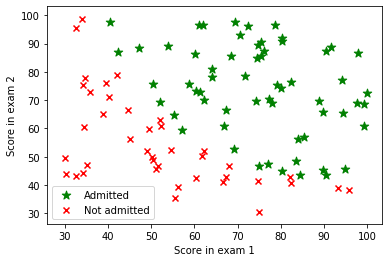

In [322]:
plot_graph(data1)

plt.show()

In [336]:
X_predict = [1, 45, 85]
X_predict[1:3] = (X_predict[1:3] - mean) / std
sigmoid(np.dot(X_predict, theta))


0.7760233592331854

In [338]:
np.dot(X_predict, theta)

1.242640857708523

In [337]:
X_predict

[1, -1.0609537585247986, 1.010505362526311]

In [324]:
theta

Bias      1.716576
Score1    4.008878
Score2    3.740009
dtype: float64

In [325]:
# theta = theta[:,0]  # Make theta a 1-d array.
# x = np.linspace(-6, 6, 50)
# y = -(theta[0] + theta[1]*x)/theta[2]
# plt.plot(x, y)

# w = clf.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-5, 5)
# yy = a * xx - (clf.intercept_[0]) / w[1]

# plt.plot(xx, yy, 'k-')

In [392]:
xx

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [411]:
def calculate_yaxis(x_val, mean, std, theta, verbose=False):
    # Scale the x-axis values to be the same as the model
    xx0 = (x_val - mean[0]) / std[0]
    
    # Calculate the y-axis values based on sigmoid(0) = 0.5 (the decision boundary)
    # In this case, we start with sigmoid(X.T.dot(theta))
    # So we need X.T.dot(theta) = 0
    # And we transfer all the values to the other side in order to calculate the y-axis value
    yy0 = -(theta[0] + (theta[1] * xx0)) / theta[2]

    # Convert y-axis values back to their real values
    yy0 = yy0 * std[1] + mean[1]
    
    if verbose:
        print(list(zip(x_val, yy0)))
        
    return yy0
    
calculate_yaxis(xx, mean, std, theta, True)

[(0.0, 124.8906767363154), (2.0408163265306123, 122.80156472866226), (4.081632653061225, 120.7124527210091), (6.122448979591837, 118.62334071335599), (8.16326530612245, 116.53422870570283), (10.204081632653061, 114.4451166980497), (12.244897959183675, 112.35600469039656), (14.285714285714286, 110.26689268274342), (16.3265306122449, 108.17778067509029), (18.367346938775512, 106.08866866743715), (20.408163265306122, 103.999556659784), (22.448979591836736, 101.91044465213088), (24.48979591836735, 99.82133264447774), (26.53061224489796, 97.7322206368246), (28.571428571428573, 95.64310862917145), (30.612244897959183, 93.55399662151831), (32.6530612244898, 91.46488461386517), (34.69387755102041, 89.37577260621202), (36.734693877551024, 87.28666059855888), (38.775510204081634, 85.19754859090574), (40.816326530612244, 83.10843658325261), (42.85714285714286, 81.01932457559947), (44.89795918367347, 78.93021256794633), (46.93877551020408, 76.84110056029319), (48.9795918367347, 74.75198855264004),

array([124.89067674, 122.80156473, 120.71245272, 118.62334071,
       116.53422871, 114.4451167 , 112.35600469, 110.26689268,
       108.17778068, 106.08866867, 103.99955666, 101.91044465,
        99.82133264,  97.73222064,  95.64310863,  93.55399662,
        91.46488461,  89.37577261,  87.2866606 ,  85.19754859,
        83.10843658,  81.01932458,  78.93021257,  76.84110056,
        74.75198855,  72.66287654,  70.57376454,  68.48465253,
        66.39554052,  64.30642851,  62.21731651,  60.1282045 ,
        58.03909249,  55.94998048,  53.86086848,  51.77175647,
        49.68264446,  47.59353245,  45.50442045,  43.41530844,
        41.32619643,  39.23708442,  37.14797241,  35.05886041,
        32.9697484 ,  30.88063639,  28.79152438,  26.70241238,
        24.61330037,  22.52418836])

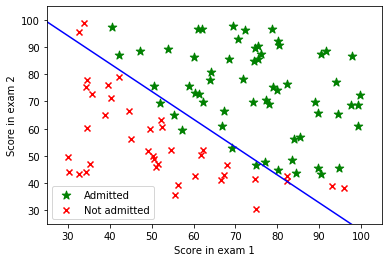

In [412]:
full_X = X * std + mean

plot_graph(data1)
a = -theta[1] / theta[2]
xx = np.linspace(0,100)
yy = calculate_yaxis(xx, mean, std, theta)
plt.plot(xx, yy, 'k-', c="blue")
plt.xlim((25,105))
plt.ylim((25,105))
plt.show()

In [413]:
sigmoid(0)

0.5

In [100]:
# Intermission... calculating compound interest
def comound_interest(amount, rate, frequency, years):
    return amount*((1+rate/frequency)**(frequency*years))
    
print(comound_interest(10000, 0.06, 1, 10))
print(comound_interest(10000, 0.06, 12, 10))
print(comound_interest(10000, 0.06, 12, 11))
print(comound_interest(10000, 0.06, 365, 10))

def eulers_comound_interest(amount, rate, years):
    return amount*(math.e ** (rate * years))

print(eulers_comound_interest(10000, 0.06, 10))


17908.476965428545
18193.9673403229
19316.131435008163
18220.289545384272
18221.18800390509
